#DATA LOADING AND PREPOCESSING

## LOADING

###**Step 1: Download image data**
(fer2013.tar.gz)** from: https://www.kaggle.com/c/challenges-in-representation-learning-facial-expression-recognition-challenge/data

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


`## **Step 2: Load data into python (FIRST TIME ONLY) using the following codes :**`

In [ ]:
def load_fer2013(path='/content/drive/MyDrive/Data/fer2013.csv'):
    import pandas as pd
    fer_data = pd.read_csv(path)
    fer_data['emotion_type'] = fer_data['emotion']
    fer_data = fer_data.replace(0, 'Angry')
    fer_data = fer_data.replace(1, 'Disgust')
    fer_data = fer_data.replace(2, 'Fear')
    fer_data = fer_data.replace(3, 'Happy')
    fer_data = fer_data.replace(4, 'Sad')
    fer_data = fer_data.replace(5, 'Surprise')
    fer_data = fer_data.replace(6, 'Neutral')
    fer_data = fer_data.drop('emotion', axis = 1)
    train_data = fer_data[fer_data['Usage']=='Training'].reset_index(drop=True)
    publictest_data = fer_data[fer_data['Usage']=='PublicTest'].reset_index(drop=True)
    privatetest_data = fer_data[fer_data['Usage']=='PrivateTest'].reset_index(drop=True)
    
    return train_data, publictest_data, privatetest_data

train_data, publictest_data, privatetest_data = load_fer2013()


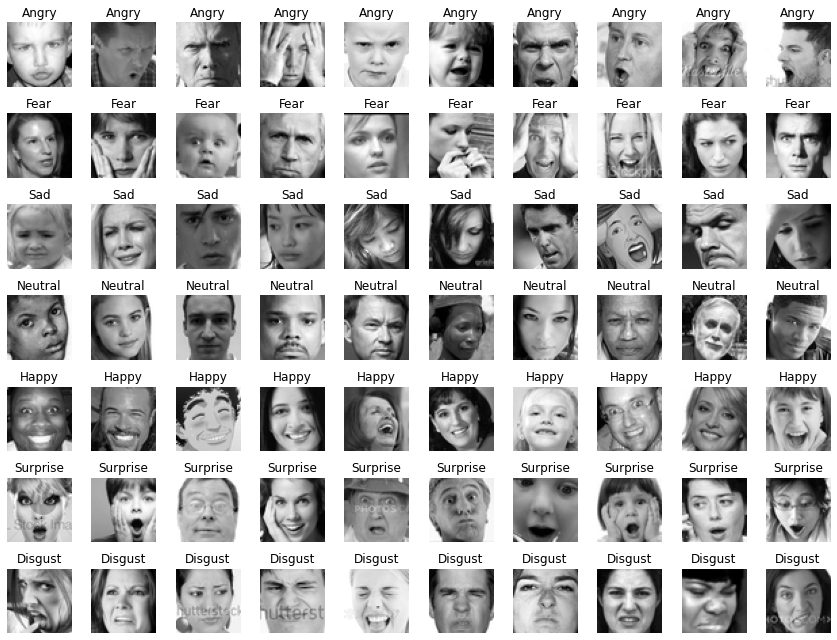

In [ ]:
def plot_faces(data, images_per_row=10, size = 48):

    import matplotlib.pyplot as plt
    import numpy as np

    # set figure size
    plt
    plt.figure(figsize=(12,9))
    n_rows = len(data['emotion_type'].unique())
    
    loc = 0

    for category in data['emotion_type'].unique():
        # sample K images for each category
        images = data[data['emotion_type']==category].sample(images_per_row)
        
        for i in range(images_per_row):
            some_pixel = np.array(images.iloc[i]['pixels'].split()).astype('float32') # select one image sample
            some_image = some_pixel.reshape(size, size) # reshape from rank-1 tensor (2304,) to rank-2 tensor (48,48) 
            
            # put image in subplots
            loc += 1
            ax = plt.subplot(n_rows, images_per_row, loc)
            
            ax.imshow(some_image, cmap='gray')
            ax.axis("off")
            ax.set_title(images.iloc[i]['emotion_type'])
        plt.tight_layout()
    plt.axis("off")

plot_faces(train_data, images_per_row=10, size = 48)

### **Split data into different sets**

In [ ]:
inhouse_train_data =train_data.sample(frac=0.8,random_state=42) 
inhouse_val_data=train_data.drop(inhouse_train_data.index)

# reset the index
inhouse_train_data = inhouse_train_data.reset_index(drop=True)
inhouse_val_data = inhouse_val_data.reset_index(drop=True)

## **PREPROCESSING**

### Label Encoding

In [ ]:
#### loading libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

#### (1) processing in-house training dataset
inhouse_train_features=inhouse_train_data.pixels.str.split(expand=True)
inhouse_train_labels = encoder.fit_transform(inhouse_train_data['emotion_type'])

#### (2) processing in-house validation dataset
inhouse_valid_features=inhouse_val_data.pixels.str.split(expand=True)
inhouse_valid_labels = encoder.fit_transform(inhouse_val_data['emotion_type'])

#### (3) processing public-test dataset
publictest_features=publictest_data.pixels.str.split(expand=True)
publictest_labels = encoder.fit_transform(publictest_data['emotion_type'])

#### (4) processing private-test dataset
privatetest_features=privatetest_data.pixels.str.split(expand=True)
privatetest_labels = encoder.fit_transform(privatetest_data['emotion_type'])

In [ ]:
import numpy as np
np.save("/content/drive/MyDrive/Data/inhouse_train_features", inhouse_train_features.to_numpy())
np.save("/content/drive/MyDrive/Data/inhouse_train_labels", inhouse_train_labels)
np.save("/content/drive/MyDrive/Data/inhouse_valid_features", inhouse_valid_features.to_numpy())
np.save("/content/drive/MyDrive/Data/inhouse_valid_labels", inhouse_valid_labels)
np.save("/content/drive/MyDrive/Data/privatetest_features", privatetest_features.to_numpy())
np.save("/content/drive/MyDrive/Data/privatetest_labels", privatetest_labels)
np.save("/content/drive/MyDrive/Data/publictest_features", publictest_features.to_numpy())
np.save("/content/drive/MyDrive/Data/publictest_labels", publictest_labels)

##### Load label-encoded data from disk (inhouse/public/private)

In [ ]:
import numpy as np
inhouse_train_features = np.load("/content/drive/MyDrive/Data/inhouse_train_features.npy", allow_pickle=True)
inhouse_valid_features = np.load("/content/drive/MyDrive/Data/inhouse_valid_features.npy", allow_pickle=True)

In [ ]:
inhouse_train_labels = np.load("/content/drive/MyDrive/Data/inhouse_train_labels.npy", allow_pickle=True)
inhouse_valid_labels = np.load("/content/drive/MyDrive/Data/inhouse_valid_labels.npy", allow_pickle=True)

In [ ]:
privatetest_features = np.load("/content/drive/MyDrive/Data/privatetest_features.npy", allow_pickle=True)
publictest_features = np.load("/content/drive/MyDrive/Data/publictest_features.npy", allow_pickle=True)

In [ ]:
privatetest_labels = np.load("/content/drive/MyDrive/Data/privatetest_labels.npy", allow_pickle=True)
publictest_labels = np.load("/content/drive/MyDrive/Data/publictest_labels.npy", allow_pickle=True)


In [ ]:
print(inhouse_train_features.shape,inhouse_train_labels.shape)

(22967, 2304) (22967,)


In [ ]:
print(inhouse_train_labels) 

[4 5 4 ... 3 2 3]


### Scaling

In [ ]:
# # Normalization for neural network, DNN, and CNN

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inhouse_train_features)

StandardScaler()

In [ ]:
np.concatenate([inhouse_train_features,inhouse_valid_features,publictest_features,privatetest_features],axis=0).shape

(35887, 2304)

In [ ]:
X_pbtest_scaled.shape

(3589, 2304)

In [ ]:

X_train_scaled = scaler.transform(inhouse_train_features)
X_val_scaled = scaler.transform(inhouse_valid_features)

np.save("/content/drive/MyDrive/Data/X_train_scaled", X_train_scaled)
np.save("/content/drive/MyDrive/Data/X_val_scaled", X_val_scaled)



In [ ]:
X_pvtest_scaled = scaler.transform(privatetest_features)
X_pbtest_scaled = scaler.transform(publictest_features)

np.save("/content/drive/MyDrive/Data/X_pvtest_scaled",X_pvtest_scaled)
np.save("/content/drive/MyDrive/Data/X_pbtest_scaled",X_pbtest_scaled)

In [ ]:
X_train_scaled = np.load("/content/drive/MyDrive/Data/X_train_scaled.npy", allow_pickle=True)
X_val_scaled = np.load("/content/drive/MyDrive/Data/X_val_scaled.npy", allow_pickle=True)


In [ ]:
X_pvtest_scaled = np.load("/content/drive/MyDrive/Data/X_private_scaled.npy", allow_pickle=True)
X_pbtest_scaled =  np.load("/content/drive/MyDrive/Data/X_pbtest_scaled.npy", allow_pickle=True)

In [ ]:
X_train_scaled_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], 48,48, 1)
X_val_scaled_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], 48,48, 1)

In [ ]:
np.save("/content/drive/MyDrive/Data/X_train_scaled_cnn", X_train_scaled_cnn)
np.save("/content/drive/MyDrive/Data/X_val_scaled_cnn", X_val_scaled_cnn)

In [ ]:
X_public_test_cnn =  X_pbtest_scaled.reshape(X_pbtest_scaled.shape[0], 48,48, 1) 
X_private_test_cnn = X_pvtest_scaled.reshape(X_pvtest_scaled.shape[0], 48,48, 1)

np.save("/content/drive/MyDrive/Data/X_public_test_cnn", X_public_test_cnn)
np.save("/content/drive/MyDrive/Data/X_private_test_cnn", X_private_test_cnn)

#### Load scaled/reshaped data for cnn

In [ ]:
X_train_scaled_cnn = np.load("/content/drive/MyDrive/Data/X_train_scaled_cnn.npy", allow_pickle=True)
X_val_scaled_cnn = np.load("/content/drive/MyDrive/Data/X_val_scaled_cnn.npy", allow_pickle=True)

In [ ]:
X_public_test_cnn = np.load("/content/drive/MyDrive/Data/X_public_test_cnn.npy", allow_pickle=True)
X_private_test_cnn = np.load("/content/drive/MyDrive/Data/X_private_test_cnn.npy", allow_pickle=True)

### One-Hot Encoding

In [ ]:
#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical
import numpy as np

y_train_c = to_categorical(inhouse_train_labels, 7)
y_val_c = to_categorical(inhouse_valid_labels, 7)
y_publictest_c = to_categorical(publictest_labels, 7)
y_privatetest_c = to_categorical(privatetest_labels, 7)

print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)

In [ ]:
np.save("/content/drive/MyDrive/Data/y_train_c", y_train_c)
np.save("/content/drive/MyDrive/Data/y_val_c", y_val_c)
np.save("/content/drive/MyDrive/Data/y_publictest_c", y_publictest_c)
np.save("/content/drive/MyDrive/Data/y_privatetest_c", y_privatetest_c)


##### Load one-hot encoded labels

In [ ]:
y_train_c = np.load("/content/drive/MyDrive/Data/y_train_c.npy", allow_pickle=True)
y_val_c = np.load("/content/drive/MyDrive/Data/y_val_c.npy", allow_pickle=True)
y_publictest_c = np.load("/content/drive/MyDrive/Data/y_publictest_c.npy", allow_pickle=True)
y_privatetest_c = np.load("/content/drive/MyDrive/Data/y_privatetest_c.npy", allow_pickle=True)


### Data augmentation

In [ ]:
X_val_scaled_cnn.shape

(5742, 48, 48, 1)

In [ ]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(rotation_range=10,
                                         width_shift_range=0.05,
                                         height_shift_range=0.05,
                                         horizontal_flip=True,
                                         shear_range=0.2,
                                         zoom_range=0.2).flow(X_train_scaled_cnn, y_train_c, batch_size=32)

In [ ]:
inhouse_train_features_subset = inhouse_train_features[0:10]
y_train_c_subset = y_train_c[0:10]

original_train_generator = ImageDataGenerator(rotation_range=100,
                                         width_shift_range=0.05,
                                         height_shift_range=0.05,
                                         horizontal_flip=True,
                                         shear_range=0.2,
                                         zoom_range=0.2).flow(inhouse_train_features_subset.reshape(len(inhouse_train_features_subset), 48,48,1) , y_train_c_subset, batch_size=32, shuffle=False)



In [ ]:
valid_generator = ImageDataGenerator().flow(X_val_scaled_cnn, y_val_c, batch_size=32)
pb_test_generator = ImageDataGenerator().flow(X_public_test_cnn, y_publictest_c, batch_size=32)
pvt_test_generator = ImageDataGenerator().flow(X_private_test_cnn, y_privatetest_c, batch_size=32)

(10, 48, 48, 1)


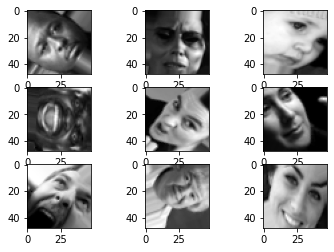

In [ ]:
from matplotlib import pyplot
batch_features = original_train_generator.next()[0]
print(batch[0].shape)
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	
	# convert to unsigned integers for viewing
	# image = train_generator.next()[0].astype('uint8').reshape(32,2304)
	# image = train_generator.next()[0].reshape(32,2304)
	image =batch_features[i].reshape(48,48)
	# plot raw pixel data
	pyplot.imshow(image, cmap='gray')
	ax = plt.subplot(n_rows, images_per_row, loc)
	
	ax.imshow(some_image, cmap='gray')
	ax.axis("off")
	ax.set_title(images.iloc[i]['emotion_type'])

# # show the figure

pyplot.show()
# train_generator.next()[0].astype('uint8').reshape(32,2304)

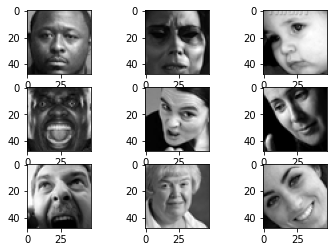

In [ ]:
from matplotlib import pyplot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# image = train_generator.next()[0].reshape(32,2304)
	image = inhouse_train_features_subset[i].astype('float').reshape(48,48)
	# plot raw pixel data
	pyplot.imshow(image, cmap='gray')
# # show the figure

pyplot.show()
# train_generator.next()[0].astype('uint8').reshape(32,2304)

In [ ]:
type(train_generator)

keras.preprocessing.image.NumpyArrayIterator

### Gabor filtering

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# x = inhouse_train_features.iloc[1].values.astype(float).reshape(48,48)
# res = extract_gabor_features(x)
# res.shape

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np

def extract_gabor_features(image, pca_component = 20):
    res = []
    for freq in [0.25]:
      for theta in [np.pi/4,np.pi/2,np.pi*3/4,np.pi]:
        for bandwidth in [1]:
          coeff_real, _ = gabor(image, frequency=freq, theta=theta,bandwidth=bandwidth)
          #res.append(coeff_real.flatten())
          res.append(coeff_real)
    res = np.array(res)
    return res

x1 = inhouse_train_features.iloc[0].values.astype(float).reshape(48,48)
res1 = extract_gabor_features(x1)

res1.shape

(4, 48, 48)

In [ ]:
from skimage.filters import gabor_kernel, gabor
import numpy as np

def extract_gabor_features_list(images, pca_component = 20):
    res = []
    for image in images:
      image_features = [] 
      image = image.astype(int).reshape(48,48)
      for freq in [0.25]:
        for theta in [np.pi/4,np.pi/2,np.pi*3/4,np.pi]:
          for bandwidth in [1]:
            coeff_real, _ = gabor(image, frequency=freq, theta=theta,bandwidth=bandwidth)
            #res.append(coeff_real.flatten())
            image_features.append(coeff_real)
      res.append(image_features)
    res = np.array(res)
    return res

#### Extract features (run one time only)

In [ ]:
inhouse_valid_features.to_numpy()

In [ ]:
# inhouse_train_features.shape
X_features_extracted = extract_gabor_features_list(inhouse_train_features[0:15000].to_numpy())
X_features_extracted_val = extract_gabor_features_list(inhouse_valid_features.to_numpy())

In [ ]:
np.save("/content/drive/MyDrive/Data/X_features_extracted", X_features_extracted)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val", X_features_extracted_val)

In [ ]:
X_features_public_test = extract_gabor_features_list(publictest_features)
X_features_private_test = extract_gabor_features_list(privatetest_features)

In [ ]:
np.save("/content/drive/MyDrive/Data/X_features_public_test", X_features_public_test)
np.save("/content/drive/MyDrive/Data/X_features_private_test", X_features_private_test)

In [ ]:
print(X_features_extracted.shape,len(inhouse_train_labels))

(15000, 4, 48, 48) 22967


#### Load saved inhouse_train/valid_features on runs after the first

In [ ]:
inhouse_train_features = np.load("/content/drive/MyDrive/Data/inhouse_train_features.npy", allow_pickle=True)
inhouse_valid_features = np.load("/content/drive/MyDrive/Data/inhouse_valid_features.npy", allow_pickle=True)


In [ ]:
inhouse_train_labels = np.load("/content/drive/MyDrive/Data/inhouse_train_labels.npy", allow_pickle=True)
inhouse_valid_labels = np.load("/content/drive/MyDrive/Data/inhouse_valid_labels.npy", allow_pickle=True)

#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical
import numpy as np
y_train_c = to_categorical(inhouse_train_labels, 7)
y_val_c = to_categorical(inhouse_valid_labels, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)
# y_val_c[0]

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)


#### Load saved extracted_features on runs after the first

In [ ]:
# X_features_extracted

X_features_extracted = np.load("/content/drive/MyDrive/Data/X_features_extracted.npy", allow_pickle=True)
X_features_extracted_val = np.load("/content/drive/MyDrive/Data/X_features_extracted_val.npy", allow_pickle=True)
X_features_extracted.shape

(15000, 4, 48, 48)

In [ ]:
X_features_extracted_reshape = np.transpose(X_features_extracted, (0,2,3, 1))
X_features_extracted_val_reshape = np.transpose(X_features_extracted_val, (0,2,3, 1))
print(X_features_extracted_reshape.shape,X_features_extracted_val_reshape.shape)

np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape", X_features_extracted_reshape)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape", X_features_extracted_val_reshape)


In [ ]:
X_features_public_test = np.load("/content/drive/MyDrive/Data/X_features_public_test.npy", allow_pickle=True)
X_features_private_test = np.load("/content/drive/MyDrive/Data/X_features_private_test.npy", allow_pickle=True)

In [ ]:
X_features_public_test_reshape = np.transpose(X_features_public_test, (0,2,3, 1))
X_features_private_test_reshape = np.transpose(X_features_private_test, (0,2,3, 1))

np.save("/content/drive/MyDrive/Data/X_features_public_test_reshape", X_features_public_test_reshape)
np.save("/content/drive/MyDrive/Data/X_features_private_test_reshape", X_features_private_test_reshape)

In [ ]:
X_features_extracted_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape.npy", allow_pickle=True)
X_features_extracted_val_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape.npy", allow_pickle=True)

In [ ]:
X_features_public_test_reshape = np.load("/content/drive/MyDrive/Data/X_features_public_test_reshape.npy", allow_pickle=True)
X_features_private_test_reshape = np.load("/content/drive/MyDrive/Data/X_features_private_test_reshape.npy", allow_pickle=True)

In [ ]:
X_features_extracted_reshape.shape

(15000, 48, 48, 4)

#### Concatenate extracted features with original images

In [ ]:
# inhouse_reshape_train = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))
# inhouse_reshape_val = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

train_original_images_reshaped = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))[0:15000]
val_original_images_reshaped = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

np.save("/content/drive/MyDrive/Data/train_original_images_reshaped", train_original_images_reshaped)
np.save("/content/drive/MyDrive/Data/val_original_images_reshaped", val_original_images_reshaped)



In [ ]:
# NO LONGER NEED TO LOAD: inhouse_train_features
train_original_images_reshaped = np.load("/content/drive/MyDrive/Data/train_original_images_reshaped.npy",allow_pickle=True)
val_original_images_reshaped = np.load("/content/drive/MyDrive/Data/val_original_images_reshaped.npy",allow_pickle=True)


In [ ]:
# np.concatenate()
X_features_extracted_reshape_conc = np.concatenate([X_features_extracted_reshape,train_original_images_reshaped ], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc", X_features_extracted_reshape_conc)


In [ ]:
X_features_extracted_val_reshape_conc = np.concatenate([X_features_extracted_val_reshape, val_original_images_reshaped], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc", X_features_extracted_val_reshape_conc)

In [ ]:
X_features_extracted_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc.npy",allow_pickle=True)
X_features_extracted_val_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc.npy",allow_pickle=True)


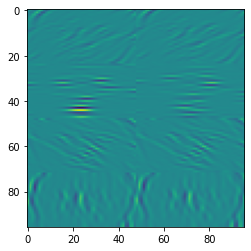

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); 
plt.clf(); 
plt.imshow(res_1_reshaped)
# type(res1)

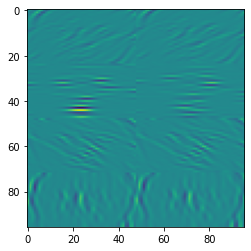

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); plt.clf(); plt.imshow(res_1_reshaped)

In [ ]:
inhouse_train_data

,pixels,Usage,emotion_type
0,138 147 144 142 138 141 124 41 34 41 55 61 65 ...,Training,Neutral
1,17 20 25 30 33 36 41 42 43 46 46 48 50 51 51 4...,Training,Sad
2,109 97 125 135 148 168 149 149 180 186 188 160...,Training,Neutral
3,165 69 58 62 64 66 50 43 44 43 47 49 50 41 39 ...,Training,Fear
4,85 86 85 85 85 84 85 85 85 85 84 90 55 74 102 ...,Training,Angry
...,...,...,...
22962,40 47 42 52 52 49 50 48 41 43 42 40 34 32 33 3...,Training,Happy
22963,13 16 14 12 10 9 8 9 12 14 20 19 19 20 25 29 3...,Training,Angry
22964,10 26 64 82 94 104 118 125 129 136 133 133 135...,Training,Happy
22965,104 104 87 107 149 165 174 179 179 177 178 179...,Training,Fear


In [ ]:
res.shape

(4, 48, 48)

## Dimensionality Reduction

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)  # Let M = 2

matrix_shape = X_features_extracted_reshape.shape
X_features_extracted_reshape_pca = X_features_extracted_reshape.reshape((len(X_features_extracted_reshape),matrix_shape[1]*matrix_shape[2]*matrix_shape[3] ))
print(X_features_extracted_reshape_pca.shape)

(15000, 9216)


PCA(n_components=0.95)

In [ ]:
X_features_extracted_pca_train = pca.transform(X_features_extracted_reshape_pca)

In [ ]:
pca.fit(X_features_extracted_reshape_pca)
np.save("/content/drive/MyDrive/Data/X_features_extracted_pca_train", X_features_extracted_pca_train)

In [ ]:
X_features_extracted_val_reshape_pca = X_features_extracted_val_reshape.reshape((len(X_features_extracted_val_reshape),matrix_shape[1]*matrix_shape[2]*matrix_shape[3] ))
X_features_extracted_pca_val = pca.transform(X_features_extracted_val_reshape_pca)
np.save("/content/drive/MyDrive/Data/X_features_extracted_pca_val", X_features_extracted_pca_val)

In [ ]:
X_features_extracted_pbtest_reshape_pca = X_features_public_test_reshape.reshape((len(X_features_public_test_reshape),matrix_shape[1]*matrix_shape[2]*matrix_shape[3] ))
X_features_extracted_pca_pbtest = pca.transform(X_features_extracted_pbtest_reshape_pca)
np.save("/content/drive/MyDrive/Data/X_features_extracted_pca_pbtest", X_features_extracted_pca_pbtest)

In [ ]:
X_features_extracted_pvtest_reshape_pca = X_features_private_test_reshape.reshape((len(X_features_private_test_reshape),matrix_shape[1]*matrix_shape[2]*matrix_shape[3] ))
X_features_extracted_pca_pvtest = pca.transform(X_features_extracted_pvtest_reshape_pca)
np.save("/content/drive/MyDrive/Data/X_features_extracted_pca_pvtest", X_features_extracted_pca_pvtest)

In [ ]:
print('Minimum number of PCs:', pca.n_components_)
print('Cumulative variance ratio: ',np.sum(pca.explained_variance_ratio_))

Minimum number of PCs: 631
Cumulative variance ratio:  0.9500722142620903


## Concatenate extracted features with original images

In [ ]:
# inhouse_reshape_train = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))
# inhouse_reshape_val = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

train_original_images_reshaped = np.reshape(inhouse_train_features, (len(inhouse_train_features), 48,48 ,1))[0:15000]
val_original_images_reshaped = np.reshape(inhouse_valid_features, (len(inhouse_valid_features), 48,48 ,1))

np.save("/content/drive/MyDrive/Data/train_original_images_reshaped", train_original_images_reshaped)
np.save("/content/drive/MyDrive/Data/val_original_images_reshaped", val_original_images_reshaped)



In [ ]:
# NO LONGER NEED TO LOAD: inhouse_train_features
train_original_images_reshaped = np.load("/content/drive/MyDrive/Data/train_original_images_reshaped.npy",allow_pickle=True)
val_original_images_reshaped = np.load("/content/drive/MyDrive/Data/val_original_images_reshaped.npy",allow_pickle=True)


In [ ]:
# np.concatenate()
X_features_extracted_reshape_conc = np.concatenate([X_features_extracted_reshape,train_original_images_reshaped ], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc", X_features_extracted_reshape_conc)


In [ ]:
X_features_extracted_val_reshape_conc = np.concatenate([X_features_extracted_val_reshape, val_original_images_reshaped], axis = 3)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc", X_features_extracted_val_reshape_conc)

In [ ]:
X_features_extracted_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape_conc.npy",allow_pickle=True)
X_features_extracted_val_reshape_conc = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape_conc.npy",allow_pickle=True)


# TRAIN MODELS: 1 CNN and DNN

## CNN with Scaled Data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU

cnn_scaled_data= Sequential() # create Sequential model
cnn_scaled_data.add(Conv2D(32, (1,1), input_shape=(48,48,1), padding='same', activation = 'relu')) 
# block 1
cnn_scaled_data.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_scaled_data.add(PReLU())
cnn_scaled_data.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_scaled_data.add(PReLU())
cnn_scaled_data.add(MaxPooling2D(pool_size=(2,2), strides=2))
# block 2 
cnn_scaled_data.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_scaled_data.add(PReLU())
cnn_scaled_data.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_scaled_data.add(PReLU())
cnn_scaled_data.add(MaxPooling2D(pool_size=(2,2), strides=2))

# fc
cnn_scaled_data.add(Flatten())
cnn_scaled_data.add(Dense(2048, activation = 'relu')) 
cnn_scaled_data.add(Dropout(0.2))
cnn_scaled_data.add(Dense(1024, activation = 'relu')) 
cnn_scaled_data.add(Dropout(0.5))
cnn_scaled_data.add(Dense(7, activation = 'softmax')) 
cnn_scaled_data.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

cnn_scaled_data.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import time
start = time.time()
cnn_scaled_data_history = cnn_scaled_data.fit(X_train_scaled_cnn,y_train_c,
                                          batch_size=128, epochs=50, verbose=1,
                                          validation_data=(X_val_scaled_cnn, y_val_c),
                                          callbacks=callback)

end = time.time()

print('Run time: ', end-start,'s')

Epoch 1/50
180/180 [==============================] - ETA: 0s - loss: 1.7433 - accuracy: 0.2938
Epoch 1: val_loss improved from inf to 1.63649, saving model to ./best_weights.h5
180/180 [==============================] - 47s 246ms/step - loss: 1.7433 - accuracy: 0.2938 - val_loss: 1.6365 - val_accuracy: 0.3675
Epoch 2/50
180/180 [==============================] - ETA: 0s - loss: 1.5787 - accuracy: 0.3886
Epoch 2: val_loss improved from 1.63649 to 1.50685, saving model to ./best_weights.h5
180/180 [==============================] - 42s 233ms/step - loss: 1.5787 - accuracy: 0.3886 - val_loss: 1.5068 - val_accuracy: 0.4269
Epoch 3/50
180/180 [==============================] - ETA: 0s - loss: 1.4604 - accuracy: 0.4379
Epoch 3: val_loss improved from 1.50685 to 1.42911, saving model to ./best_weights.h5
180/180 [==============================] - 42s 234ms/step - loss: 1.4604 - accuracy: 0.4379 - val_loss: 1.4291 - val_accuracy: 0.4526
Epoch 4/50
180/180 [==============================] - ET

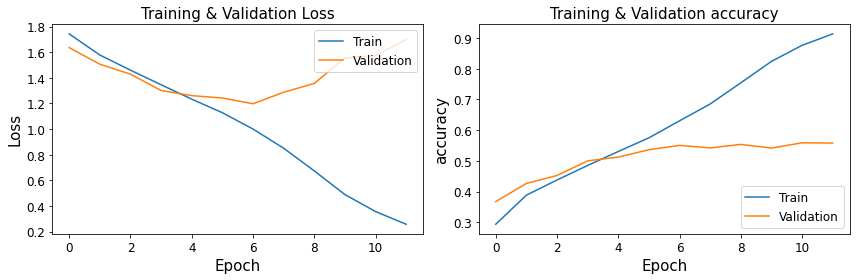

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(cnn_scaled_data_history.history['loss'], label='Train')
plt.plot(cnn_scaled_data_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(cnn_scaled_data_history.history['accuracy'], label='Train')
plt.plot(cnn_scaled_data_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/cnn_scaled_data.h5"
tf.keras.models.save_model(cnn_scaled_data,path)

In [ ]:
from tensorflow.keras.models import load_model

cnn_scaled_data = load_model("/content/drive/MyDrive/Models/cnn_scaled_data.h5")

##### Accuracy scores

In [ ]:
from sklearn.metrics import accuracy_score

train_predicted_labels_cnn_sd = cnn_scaled_data.predict(X_train_scaled_cnn)
val_predicted_labels_cnn_sd = cnn_scaled_data.predict(X_val_scaled_cnn)
private_test_predicted_labels__cnn_sd = cnn_scaled_data.predict(X_private_test_cnn.astype(int))
public_test_predicted_labels__cnn_sd = cnn_scaled_data.predict(X_public_test_cnn.astype(int))

train_labels_cnn_sd = np.argmax(train_predicted_labels_cnn_sd,axis=1) # find the index of column which has maximum value in each row
val_labels_cnn_sd = np.argmax(val_predicted_labels_cnn_sd,axis=1)
private_labels_cnn_sd = np.argmax(private_test_predicted_labels__cnn_sd,axis=1)
public_labels_cnn_sd = np.argmax(public_test_predicted_labels__cnn_sd,axis=1)


tlcs = accuracy_score(inhouse_train_labels,train_labels_cnn_sd)
vlcs = accuracy_score(inhouse_valid_labels,val_labels_cnn_sd)
plcs = accuracy_score(privatetest_labels,private_labels_cnn_sd)
pplcs = accuracy_score(publictest_labels,public_labels_cnn_sd)



In [ ]:
methods = ["CNN (scaled)"]
train = [tlcs]
validation = [vlcs]
private_test = [plcs]
public_test = [pplcs]

final_accuracy_report = pd.DataFrame({'Method':methods, 'Train':train, 'Validation': validation, 'Private Test': private_test, 'Public Test':public_test})
final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351


## CNN MODEL with augmented data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU

cnn_aug_model= Sequential() # create Sequential model
cnn_aug_model.add(Conv2D(32, (1,1), input_shape=(48,48,1), padding='same', activation = 'relu')) 
# block 1
cnn_aug_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_aug_model.add(PReLU())
cnn_aug_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_aug_model.add(PReLU())
cnn_aug_model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# block 2 
cnn_aug_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_aug_model.add(PReLU())
cnn_aug_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_aug_model.add(PReLU())
cnn_aug_model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# fc
cnn_aug_model.add(Flatten())
cnn_aug_model.add(Dense(2048, activation = 'relu')) 
cnn_aug_model.add(Dropout(0.2))
cnn_aug_model.add(Dense(1024, activation = 'relu')) 
cnn_aug_model.add(Dropout(0.5))
cnn_aug_model.add(Dense(7, activation = 'softmax')) 
cnn_aug_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
cnn_aug_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import time
start = time.time()
cnn_aug_model_history = cnn_aug_model.fit_generator(train_generator,
                                          steps_per_epoch=len(y_train_c) // 32,
                                          epochs=50,
                                          validation_data=valid_generator,
                                          validation_steps=len(y_val_c) // 32,
                                          callbacks=callback)
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


716/717 [============================>.] - ETA: 0s - loss: 1.7316 - accuracy: 0.2981
Epoch 1: val_loss improved from inf to 1.59219, saving model to ./best_weights.h5
717/717 [==============================] - 26s 32ms/step - loss: 1.7315 - accuracy: 0.2981 - val_loss: 1.5922 - val_accuracy: 0.3904
Epoch 2/50
716/717 [============================>.] - ETA: 0s - loss: 1.5815 - accuracy: 0.3819
Epoch 2: val_loss improved from 1.59219 to 1.44939, saving model to ./best_weights.h5
717/717 [==============================] - 22s 31ms/step - loss: 1.5816 - accuracy: 0.3819 - val_loss: 1.4494 - val_accuracy: 0.4464
Epoch 3/50
716/717 [============================>.] - ETA: 0s - loss: 1.4560 - accuracy: 0.4315
Epoch 3: val_loss improved from 1.44939 to 1.31309, saving model to ./best_weights.h5
717/717 [==============================] - 22s 31ms/step - loss: 1.4562 - accuracy: 0.4313 - val_loss: 1.3131 - val_accuracy: 0.4997
Epoch 4/50
717/717 [==============================] - ETA: 0s - loss: 

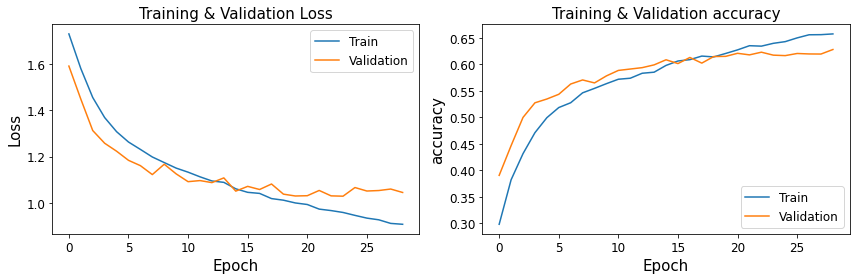

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(cnn_aug_model_history.history['loss'], label='Train')
plt.plot(cnn_aug_model_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(cnn_aug_model_history.history['accuracy'], label='Train')
plt.plot(cnn_aug_model_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/cnn_aug_model.h5"
tf.keras.models.save_model(cnn_aug_model,path)

In [ ]:
from tensorflow.keras.models import load_model

cnn_aug_model = load_model("/content/drive/MyDrive/Models/cnn_aug_model.h5")

##### Accuracy scores

In [ ]:
from sklearn.metrics import accuracy_score

train_predicted_labels_cnn_ad = cnn_aug_model.predict(X_train_scaled_cnn)
val_predicted_labels_cnn_ad = cnn_aug_model.predict(X_val_scaled_cnn)
private_test_predicted_labels__cnn_ad = cnn_aug_model.predict(X_private_test_cnn.astype('float'))
public_test_predicted_labels__cnn_ad = cnn_aug_model.predict(X_public_test_cnn.astype('float'))

train_labels_cnn_ad = np.argmax(train_predicted_labels_cnn_ad,axis=1) # find the index of column which has maximum value in each row
val_labels_cnn_ad = np.argmax(val_predicted_labels_cnn_ad,axis=1)
private_labels_cnn_ad = np.argmax(private_test_predicted_labels__cnn_ad,axis=1)
public_labels_cnn_ad = np.argmax(public_test_predicted_labels__cnn_ad,axis=1)


In [ ]:

tlca= accuracy_score(inhouse_train_labels,train_labels_cnn_ad)
vlca= accuracy_score(inhouse_valid_labels,val_labels_cnn_ad)
plca= accuracy_score(privatetest_labels,private_labels_cnn_ad)
pplca= accuracy_score(publictest_labels,public_labels_cnn_ad)

print("Train acc: ", tlca, "Val acc: ",vlca,"Private test acc:",plca, "Public test acc",pplca)


Train acc:  0.7576087429790569 Val acc:  0.6276558690351793 Private test acc: 0.6210643633324046 Public test acc 0.6152131512956255


In [ ]:
methods = ["CNN (scaled)", "CNN (Augmented Data)"]
train = [tlcs,tlca]
validation = [vlcs,vlca]
private_test = [plcs,plca]
public_test = [pplcs,pplca]

final_accuracy_report = pd.DataFrame({'Method':methods, 'Train':train, 'Validation': validation, 'Private Test': private_test, 'Public Test':public_test})
final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213


In [ ]:
final_accuracy_report.to_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index=None)

In [ ]:
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)
final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213


## CNN With Gabor Extracted Feature Images

### Load saved inhouse_train/valid_features on runs after the first

In [ ]:
inhouse_train_features = np.load("/content/drive/MyDrive/Data/inhouse_train_features.npy", allow_pickle=True)
inhouse_valid_features = np.load("/content/drive/MyDrive/Data/inhouse_valid_features.npy", allow_pickle=True)


In [ ]:
inhouse_train_labels = np.load("/content/drive/MyDrive/Data/inhouse_train_labels.npy", allow_pickle=True)
inhouse_valid_labels = np.load("/content/drive/MyDrive/Data/inhouse_valid_labels.npy", allow_pickle=True)

#converting labels from numerical to dummy

from tensorflow.keras.utils import to_categorical
import numpy as np
y_train_c = to_categorical(inhouse_train_labels, 7)
y_val_c = to_categorical(inhouse_valid_labels, 7)
print('Categorical Train Labels Matrix: ', y_train_c.shape)
print('Categorical Validation Labels Matrix: ', y_val_c.shape)
# y_val_c[0]

Categorical Train Labels Matrix:  (22967, 7)
Categorical Validation Labels Matrix:  (5742, 7)


### Load saved extracted_features on runs after the first

In [ ]:
# X_features_extracted

X_features_extracted = np.load("/content/drive/MyDrive/Data/X_features_extracted.npy", allow_pickle=True)
X_features_extracted_val = np.load("/content/drive/MyDrive/Data/X_features_extracted_val.npy", allow_pickle=True)
X_features_extracted.shape

(15000, 4, 48, 48)

In [ ]:
X_features_extracted_reshape = np.transpose(X_features_extracted, (0,2,3, 1))
X_features_extracted_val_reshape = np.transpose(X_features_extracted_val, (0,2,3, 1))
print(X_features_extracted_reshape.shape,X_features_extracted_val_reshape.shape)

np.save("/content/drive/MyDrive/Data/X_features_extracted_reshape", X_features_extracted_reshape)
np.save("/content/drive/MyDrive/Data/X_features_extracted_val_reshape", X_features_extracted_val_reshape)


(15000, 48, 48, 4) (5742, 48, 48, 4)


In [ ]:
X_features_extracted_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape.npy", allow_pickle=True)
X_features_extracted_val_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape.npy", allow_pickle=True)

### Define Model, Fit Data

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU

cnn_gabor_model= Sequential() # create Sequential model
cnn_gabor_model.add(Conv2D(32, (1,1), input_shape=(48,48,4), padding='same', activation = 'relu')) 
# block 1
cnn_gabor_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_gabor_model.add(PReLU())
cnn_gabor_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_gabor_model.add(PReLU())
cnn_gabor_model.add(MaxPooling2D(pool_size=(2,2), strides=2))
# block 2 
cnn_gabor_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
cnn_gabor_model.add(PReLU())
cnn_gabor_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
cnn_gabor_model.add(PReLU())
cnn_gabor_model.add(MaxPooling2D(pool_size=(2,2), strides=2))

# fc
cnn_gabor_model.add(Flatten())
cnn_gabor_model.add(Dense(2048, activation = 'relu')) 
cnn_gabor_model.add(Dropout(0.2))
cnn_gabor_model.add(Dense(1024, activation = 'relu')) 
cnn_gabor_model.add(Dropout(0.5))
cnn_gabor_model.add(Dense(7, activation = 'softmax')) 
cnn_gabor_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]
from tensorflow.keras.optimizers import SGD
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
cnn_gabor_model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import time
start = time.time()
cnn_gabor_model_history = cnn_gabor_model.fit(X_features_extracted_reshape, y_train_c[0:15000],
          batch_size=128, epochs=30, verbose=1,
          validation_data=(X_features_extracted_val_reshape, y_val_c))
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/30
118/118 [==============================] - 14s 109ms/step - loss: 1.7619 - accuracy: 0.2894 - val_loss: 1.6093 - val_accuracy: 0.3821
Epoch 2/30
118/118 [==============================] - 12s 106ms/step - loss: 1.5572 - accuracy: 0.4011 - val_loss: 1.4462 - val_accuracy: 0.4434
Epoch 3/30
118/118 [==============================] - 13s 113ms/step - loss: 1.4140 - accuracy: 0.4641 - val_loss: 1.3789 - val_accuracy: 0.4659
Epoch 4/30
118/118 [==============================] - 12s 104ms/step - loss: 1.2975 - accuracy: 0.5063 - val_loss: 1.3224 - val_accuracy: 0.5035
Epoch 5/30
118/118 [==============================] - 12s 103ms/step - loss: 1.1982 - accuracy: 0.5517 - val_loss: 1.2761 - val_accuracy: 0.5179
Epoch 6/30
118/118 [==============================] - 12s 103ms/step - loss: 1.0743 - accuracy: 0.6021 - val_loss: 1.3369 - val_accuracy: 0.5127
Epoch 7/30
118/118 [==============================] - 12s 104ms/step - loss: 0.9473 - accuracy: 0.6519 - val_loss: 1.5837 - val_ac

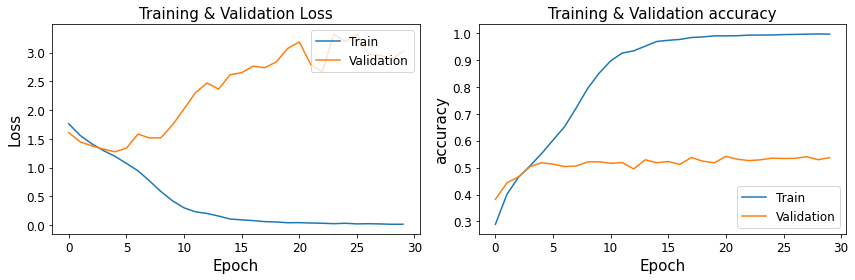

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(cnn_gabor_model_history.history['loss'], label='Train')
plt.plot(cnn_gabor_model_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(cnn_gabor_model_history.history['accuracy'], label='Train')
plt.plot(cnn_gabor_model_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/cnn_gabor_model.h5"
tf.keras.models.save_model(cnn_gabor_model,path)


In [ ]:
from tensorflow.keras.models import load_model

cnn_gabor_model = load_model("/content/drive/MyDrive/Models/cnn_gabor_model.h5")

### Accuracy scores

In [ ]:
from sklearn.metrics import accuracy_score

train_gab_cnn = cnn_gabor_model.predict(X_features_extracted_reshape.astype(float))
val_gab_cnn = cnn_gabor_model.predict(X_features_extracted_val_reshape.astype(float))
private_gab_cnn = cnn_gabor_model.predict(X_features_private_test_reshape.astype(float))
public_gab_cnn = cnn_gabor_model.predict(X_features_public_test_reshape.astype(float))

train_gab_cnn_label = np.argmax(train_gab_cnn,axis=1) # find the index of column which has maximum value in each row
val_gab_cnn_label = np.argmax(val_gab_cnn,axis=1)
private_gab_cnn_label = np.argmax(private_gab_cnn,axis=1)
public_gab_cnn_label = np.argmax(public_gab_cnn,axis=1)

In [ ]:

tlg= accuracy_score(inhouse_train_labels[0:15000],train_gab_cnn_label)
vlg= accuracy_score(inhouse_valid_labels,val_gab_cnn_label)
plg= accuracy_score(privatetest_labels,private_gab_cnn_label)
pplg= accuracy_score(publictest_labels,public_gab_cnn_label)

print(tlg,vlg,plg,pplg)


0.9985333333333334 0.5367467781260885 0.5369183616606297 0.5371969908052382


In [ ]:
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)

gabor_report = pd.DataFrame({'Method':["CNN (Gabor)"], 'Train':[tlg], 'Validation': [vlg], 'Private Test': [plg], 'Public Test':[pplg]})

final_accuracy_report = final_accuracy_report.append(gabor_report)
final_accuracy_report.to_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index=None)

final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213
0,CNN (Gabor),0.998533,0.536747,0.536918,0.537197


In [ ]:
final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.140429,0.129841
0,CNN (Gabor),0.998533,0.536747,0.536918,0.537197


## Deeper CNN with Scaled Data

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,BatchNormalization,Dropout,PReLU,Dense
from tensorflow.keras import regularizers

dnn_scaled_model= Sequential()
### Input block
dnn_scaled_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_scaled_model.add(Dropout(0.25))

### block2
dnn_scaled_model.add(Conv2D(128, (5, 5), padding='same'))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_scaled_model.add(Dropout(0.25))

### block3
dnn_scaled_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_scaled_model.add(Dropout(0.25))

### block4
dnn_scaled_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_scaled_model.add(Dropout(0.25))

### Flatten to Dense Layer
dnn_scaled_model.add(Flatten())

### Dense Layer
dnn_scaled_model.add(Dense(256))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(Dropout(0.25))

dnn_scaled_model.add(Dense(512))
dnn_scaled_model.add(BatchNormalization())
dnn_scaled_model.add(Activation('relu'))
dnn_scaled_model.add(Dropout(0.25))

dnn_scaled_model.add(Dense(7))
dnn_scaled_model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
dnn_scaled_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import time
start = time.time()

callback = [
        EarlyStopping(monitor='val_loss', patience=10, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]
                        
train_history_ = dnn_scaled_model.fit(X_train_scaled_cnn, y_train_c,
          batch_size=128, epochs=50, verbose=1,
          validation_data=(X_val_scaled_cnn, y_val_c))


end = time.time()

print('Run time: ', end-start,'s')


Epoch 1/50
180/180 [==============================] - 15s 60ms/step - loss: 1.8062 - accuracy: 0.3082 - val_loss: 1.8181 - val_accuracy: 0.3102
Epoch 2/50
180/180 [==============================] - 9s 51ms/step - loss: 1.4878 - accuracy: 0.4264 - val_loss: 1.5853 - val_accuracy: 0.3591
Epoch 3/50
180/180 [==============================] - 9s 52ms/step - loss: 1.3171 - accuracy: 0.4924 - val_loss: 1.4001 - val_accuracy: 0.4734
Epoch 4/50
180/180 [==============================] - 9s 52ms/step - loss: 1.2153 - accuracy: 0.5361 - val_loss: 1.2769 - val_accuracy: 0.5374
Epoch 5/50
180/180 [==============================] - 9s 52ms/step - loss: 1.1523 - accuracy: 0.5616 - val_loss: 1.1637 - val_accuracy: 0.5542
Epoch 6/50
180/180 [==============================] - 10s 58ms/step - loss: 1.0927 - accuracy: 0.5888 - val_loss: 1.1700 - val_accuracy: 0.5596
Epoch 7/50
180/180 [==============================] - 10s 58ms/step - loss: 1.0455 - accuracy: 0.6021 - val_loss: 1.1121 - val_accuracy: 0.5

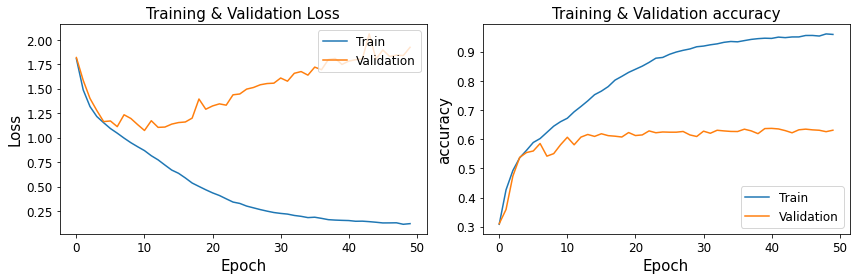

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(train_history_.history['loss'], label='Train')
plt.plot(train_history_.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(train_history_.history['accuracy'], label='Train')
plt.plot(train_history_.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

#### Accuracy scores

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/dnn_scaled_model.h5"
tf.keras.models.save_model(dnn_scaled_model,path)

In [ ]:
from tensorflow.keras.models import load_model

dnn_scaled_model = load_model("/content/drive/MyDrive/Models/dnn_scaled_model.h5")

In [ ]:
from sklearn.metrics import accuracy_score

train_predicted_labels_dnn_sd = dnn_scaled_model.predict(X_train_scaled_cnn)
val_predicted_labels_dnn_sd = dnn_scaled_model.predict(X_val_scaled_cnn)
private_test_predicted_labels__dnn_sd = dnn_scaled_model.predict(X_private_test_cnn.astype(int))
public_test_predicted_labels__dnn_sd = dnn_scaled_model.predict(X_public_test_cnn.astype(int))

train_labels_dnn_sd = np.argmax(train_predicted_labels_dnn_sd,axis=1) # find the index of column which has maximum value in each row
val_labels_dnn_sd = np.argmax(val_predicted_labels_dnn_sd,axis=1)
private_labels_dnn_sd = np.argmax(private_test_predicted_labels__dnn_sd,axis=1)
public_labels_dnn_sd = np.argmax(public_test_predicted_labels__dnn_sd,axis=1)

tlds = accuracy_score(inhouse_train_labels,train_labels_dnn_sd)
vlds = accuracy_score(inhouse_valid_labels,val_labels_dnn_sd)
plds = accuracy_score(privatetest_labels,private_labels_dnn_sd)
pplds = accuracy_score(publictest_labels,public_labels_dnn_sd)


In [ ]:
new_report = pd.DataFrame({'Method':["DNN"], 'Train':[tlds], 'Validation': [vlds], 'Private Test': [plds], 'Public Test':[pplds]})
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)

final_accuracy_report = final_accuracy_report.append(new_report)
final_accuracy_report.loc[3,"Method"] = "DNN"
final_accuracy_report.to_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index=None)

final_accuracy_report


,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213
2,CNN (Gabor),0.998533,0.536747,0.536918,0.537197
0,DNN,0.997954,0.630791,0.429368,0.426581
3,DNN,NaN,NaN,NaN,NaN


In [ ]:
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)
final_accuracy_report

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.140429,0.129841
2,CNN (Gabor),0.998533,0.536747,0.536918,0.537197
3,DNN,0.997954,0.630791,0.267763,0.255782


## Deeper CNN With Augmented Data

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,BatchNormalization,Dropout,PReLU,Dense
from tensorflow.keras import regularizers


dnn_aug_model = Sequential()
### Input block
dnn_aug_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,1)))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_aug_model.add(Dropout(0.25))

### block2
dnn_aug_model.add(Conv2D(128, (5, 5), padding='same'))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_aug_model.add(Dropout(0.25))

### block3
dnn_aug_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_aug_model.add(Dropout(0.25))

### block4
dnn_aug_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_aug_model.add(Dropout(0.25))

### Flatten to Dense Layer
dnn_aug_model.add(Flatten())

### Dense Layer
dnn_aug_model.add(Dense(256))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(Dropout(0.25))

dnn_aug_model.add(Dense(512))
dnn_aug_model.add(BatchNormalization())
dnn_aug_model.add(Activation('relu'))
dnn_aug_model.add(Dropout(0.25))

dnn_aug_model.add(Dense(7))
dnn_aug_model.add(Activation('softmax'))

In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
dnn_aug_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=20, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]


In [ ]:
import time
start = time.time()
dnn_aug_model_history = dnn_aug_model.fit_generator(train_generator,
                                          steps_per_epoch=len(y_train_c) // 32,
                                          epochs=50,
                                          validation_data=valid_generator,
                                          validation_steps=len(y_val_c) // 32,
                                          callbacks=callback)
end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


717/717 [==============================] - ETA: 0s - loss: 1.8145 - accuracy: 0.2995
Epoch 1: val_accuracy improved from -inf to 0.39141, saving model to ./best_weights.h5
717/717 [==============================] - 19s 24ms/step - loss: 1.8145 - accuracy: 0.2995 - val_loss: 1.6878 - val_accuracy: 0.3914
Epoch 2/50
715/717 [============================>.] - ETA: 0s - loss: 1.5577 - accuracy: 0.3974
Epoch 2: val_accuracy improved from 0.39141 to 0.46858, saving model to ./best_weights.h5
717/717 [==============================] - 17s 23ms/step - loss: 1.5575 - accuracy: 0.3971 - val_loss: 1.3637 - val_accuracy: 0.4686
Epoch 3/50
715/717 [============================>.] - ETA: 0s - loss: 1.4311 - accuracy: 0.4505
Epoch 3: val_accuracy improved from 0.46858 to 0.52427, saving model to ./best_weights.h5
717/717 [==============================] - 17s 23ms/step - loss: 1.4308 - accuracy: 0.4506 - val_loss: 1.2636 - val_accuracy: 0.5243
Epoch 4/50
715/717 [============================>.] - ETA

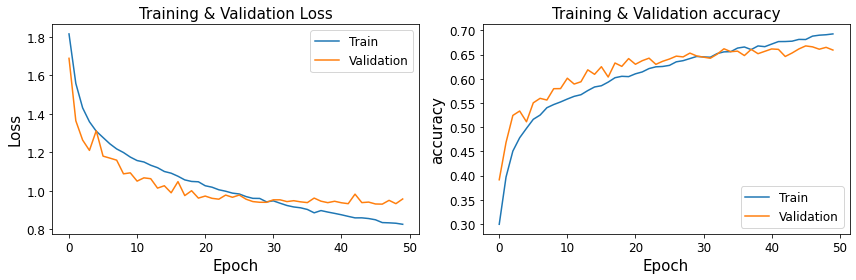

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(dnn_aug_model_history.history['loss'], label='Train')
plt.plot(dnn_aug_model_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(dnn_aug_model_history.history['accuracy'], label='Train')
plt.plot(dnn_aug_model_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

#### Accuracy scores

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/dnn_aug_model.h5"
tf.keras.models.save_model(dnn_aug_model,path)

In [ ]:
from tensorflow.keras.models import load_model

dnn_aug_model = load_model("/content/drive/MyDrive/Models/dnn_aug_model.h5")

In [ ]:
from sklearn.metrics import accuracy_score

train_predicted_labels_dnn_ad = dnn_aug_model.predict(X_train_scaled_cnn)
val_predicted_labels_dnn_ad = dnn_aug_model.predict(X_val_scaled_cnn)
private_test_predicted_labels__dnn_ad = dnn_aug_model.predict(X_private_test_cnn)
public_test_predicted_labels__dnn_ad = dnn_aug_model.predict(X_public_test_cnn)

train_labels_dnn_ad = np.argmax(train_predicted_labels_dnn_ad,axis=1) # find the index of column which has maximum value in each row
val_labels_dnn_ad = np.argmax(val_predicted_labels_dnn_ad,axis=1)
private_labels_dnn_ad = np.argmax(private_test_predicted_labels__dnn_ad,axis=1)
public_labels_dnn_ad = np.argmax(public_test_predicted_labels__dnn_ad,axis=1)

tlda = accuracy_score(inhouse_train_labels,train_labels_dnn_ad)
vlda = accuracy_score(inhouse_valid_labels,val_labels_dnn_ad)
plda = accuracy_score(privatetest_labels,private_labels_dnn_ad)
pplda = accuracy_score(publictest_labels,public_labels_dnn_ad)

print("Train acc: ", tlda, "Val acc: ",vlda,"Private test acc:",plda, "Public test acc",pplda)



Train acc:  0.7947489876779728 Val acc:  0.6586555207244862 Private test acc: 0.6617442184452493 Public test acc 0.6489272777932572


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

dnn_epca_dict = {'Method':['Deeper Convoluted Neural Network'],
               'Accuracy': [accuracy_score(publictest_labels, public_labels_dnn_ad)],
               'Precision': [precision_score(publictest_labels, public_labels_dnn_ad, average='weighted')],
               'Recall': [recall_score(publictest_labels, public_labels_dnn_ad, average='weighted')],
               'F1-Score': [f1_score(publictest_labels, public_labels_dnn_ad, average='weighted')]}


pd.DataFrame(dnn_epca_dict).to_csv("/content/drive/MyDrive/Data/final_overall_report.csv", index = None)

In [ ]:
new_report = pd.DataFrame({'Method':["DNN (Augmented)"], 'Train':[tlda], 'Validation': [vlda], 'Private Test': [plda], 'Public Test':[pplda]})

final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)
final_accuracy_report = final_accuracy_report.append(new_report)

final_accuracy_report.to_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index=None)

final_accuracy_report


,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213
2,CNN (Gabor),0.998533,0.536747,0.536918,0.537197
3,DNN,0.997954,0.630791,0.429368,0.426581
4,DNN,NaN,NaN,NaN,NaN
0,DNN (Augmented),0.794749,0.658656,0.661744,0.648927


In [ ]:
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)
final_accuracy_report.drop([0,1,2,4,6])

,Method,Train,Validation,Private Test,Public Test
3,DNN,0.997954,0.630791,0.429368,0.426581
5,DNN (Augmented),0.794749,0.658656,0.661744,0.648927


## Deeper CNN with Gabor Filters

In [ ]:
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Flatten,BatchNormalization,Dropout,PReLU,Dense
from tensorflow.keras import regularizers

dnn_gabor_model= Sequential()
### Input block
dnn_gabor_model.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,4)))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_gabor_model.add(Dropout(0.25))

### block2
dnn_gabor_model.add(Conv2D(128, (5, 5), padding='same'))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_gabor_model.add(Dropout(0.25))

### block3
dnn_gabor_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_gabor_model.add(Dropout(0.25))

### block4
dnn_gabor_model.add(Conv2D(512, (3, 3), padding='same'))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
dnn_gabor_model.add(Dropout(0.25))

### Flatten to Dense Layer
dnn_gabor_model.add(Flatten())

### Dense Layer
dnn_gabor_model.add(Dense(256))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(Dropout(0.25))

dnn_gabor_model.add(Dense(512))
dnn_gabor_model.add(BatchNormalization())
dnn_gabor_model.add(Activation('relu'))
dnn_gabor_model.add(Dropout(0.25))

dnn_gabor_model.add(Dense(7))
dnn_gabor_model.add(Activation('softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
dnn_gabor_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

import time
start = time.time()

callback = [
        EarlyStopping(monitor='val_loss', patience=20, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]
                        
dnn_gabor_model_history = dnn_gabor_model.fit(X_features_extracted_reshape, y_train_c[0:15000],
          batch_size=128, epochs=50, verbose=1,
          validation_data=(X_features_extracted_val_reshape, y_val_c))


end = time.time()

print('Run time: ', end-start,'s')


Epoch 1/50
118/118 [==============================] - 9s 66ms/step - loss: 1.8962 - accuracy: 0.2703 - val_loss: 1.6628 - val_accuracy: 0.3600
Epoch 2/50
118/118 [==============================] - 7s 62ms/step - loss: 1.5992 - accuracy: 0.3879 - val_loss: 2.7362 - val_accuracy: 0.2114
Epoch 3/50
118/118 [==============================] - 7s 58ms/step - loss: 1.4393 - accuracy: 0.4503 - val_loss: 1.5489 - val_accuracy: 0.4256
Epoch 4/50
118/118 [==============================] - 7s 58ms/step - loss: 1.3432 - accuracy: 0.4896 - val_loss: 1.3604 - val_accuracy: 0.4831
Epoch 5/50
118/118 [==============================] - 7s 60ms/step - loss: 1.2645 - accuracy: 0.5161 - val_loss: 1.3111 - val_accuracy: 0.5115
Epoch 6/50
118/118 [==============================] - 7s 60ms/step - loss: 1.1982 - accuracy: 0.5488 - val_loss: 1.2668 - val_accuracy: 0.5232
Epoch 7/50
118/118 [==============================] - 7s 59ms/step - loss: 1.1454 - accuracy: 0.5657 - val_loss: 1.3771 - val_accuracy: 0.4798

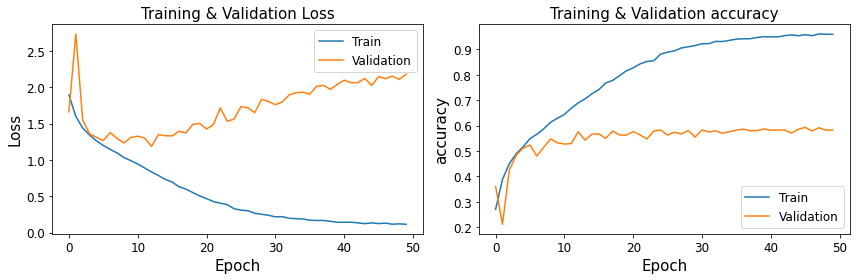

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(dnn_gabor_model_history.history['loss'], label='Train')
plt.plot(dnn_gabor_model_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)
plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(dnn_gabor_model_history.history['accuracy'], label='Train')
plt.plot(dnn_gabor_model_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

#### Accuracy scores

In [ ]:
from tensorflow.keras.models import save_model
import tensorflow as tf
import shutil

path="/content/drive/MyDrive/Models/dnn_gabor_model.h5"
tf.keras.models.save_model(dnn_gabor_model,path)

In [ ]:
from tensorflow.keras.models import load_model

dnn_gabor_model = load_model("/content/drive/MyDrive/Models/dnn_gabor_model.h5")

In [ ]:
from sklearn.metrics import accuracy_score

train_predicted_labels_dnn_gf = dnn_gabor_model.predict(X_features_extracted_reshape)
val_predicted_labels_dnn_gf = dnn_gabor_model.predict(X_features_extracted_val_reshape)
private_test_predicted_labels__dnn_gf = dnn_gabor_model.predict(X_features_private_test_reshape)
public_test_predicted_labels__dnn_gf = dnn_gabor_model.predict(X_features_public_test_reshape)

train_labels_dnn_gf = np.argmax(train_predicted_labels_dnn_gf,axis=1) # find the index of column which has maximum value in each row
val_labels_dnn_gf = np.argmax(val_predicted_labels_dnn_gf,axis=1)
private_labels_dnn_gf = np.argmax(private_test_predicted_labels__dnn_gf,axis=1)
public_labels_dnn_gf = np.argmax(public_test_predicted_labels__dnn_gf,axis=1)

tlgf = accuracy_score(inhouse_train_labels[0:15000],train_labels_dnn_gf)
vlgf = accuracy_score(inhouse_valid_labels,val_labels_dnn_gf)
plgf = accuracy_score(privatetest_labels,private_labels_dnn_gf)
pplgf = accuracy_score(publictest_labels,public_labels_dnn_gf)


In [ ]:
new_report = pd.DataFrame({'Method':["DNN (Gabor)"], 'Train':[tlgf], 'Validation': [vlgf], 'Private Test': [plgf], 'Public Test':[pplgf]})

final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)
final_accuracy_report = final_accuracy_report.append(new_report)

final_accuracy_report.to_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index=None)

final_accuracy_report


,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213
2,CNN (Gabor),0.998533,0.536747,0.536918,0.537197
3,DNN,0.997954,0.630791,0.429368,0.426581
4,DNN,NaN,NaN,NaN,NaN
5,DNN (Augmented),0.794749,0.658656,0.661744,0.648927
0,DNN (Gabor),0.997933,0.582027,0.587629,0.589022


In [ ]:
final_accuracy_report = pd.read_csv("/content/drive/MyDrive/Data/final_accuracy_report.csv",index_col=False)

final_accuracy_report.drop([4])

,Method,Train,Validation,Private Test,Public Test
0,CNN (scaled),0.732834,0.566527,0.354695,0.351351
1,CNN (Augmented Data),0.757609,0.627656,0.621064,0.615213
2,CNN (Gabor),0.998533,0.536747,0.536918,0.537197
3,DNN,0.997954,0.630791,0.429368,0.426581
5,DNN (Augmented),0.794749,0.658656,0.661744,0.648927
6,DNN (Gabor),0.997933,0.582027,0.587629,0.589022


## CNN MODEL with concatenated Gabor filters + Original Image

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import Conv2D,MaxPooling2D
from keras import regularizers
from keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU
from keras.layers.core import Dense, Activation

model1 = Sequential()
### Input block
model1.add(Conv2D(64, (3, 3), padding='same', input_shape=(48,48,4)))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block2
model1.add(Conv2D(128, (5, 5), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block3
model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### block4
model1.add(Conv2D(512, (3, 3), padding='same'))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='same'))
model1.add(Dropout(0.25))

### Flatten to Dense Layer
model1.add(Flatten())

### Dense Layer
model1.add(Dense(256))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(512))
model1.add(BatchNormalization())
model1.add(Activation('relu'))
model1.add(Dropout(0.25))

model1.add(Dense(7))
model1.add(Activation('softmax'))


In [ ]:
from tensorflow.keras.optimizers import SGD,Adam
model1.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback = [
        EarlyStopping(monitor='val_loss', patience=20, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_accuracy', verbose=True, save_best_only=True,
                        save_weights_only=True)]
                        
train_history = model1.fit(X_features_extracted_reshape_conc, y_train_c[0:15000],
          batch_size=128, 
          epochs=50, 
          verbose=1,
          validation_data=(X_features_extracted_val_reshape_conc, 
                           y_val_c)
          )

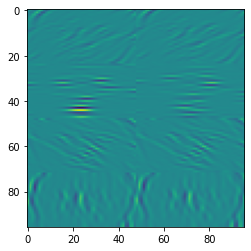

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); 
plt.clf(); 
plt.imshow(res_1_reshaped)
# type(res1)

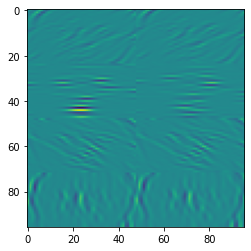

In [ ]:
import matplotlib.pyplot as plt

plt.figure(1); plt.clf(); plt.imshow(res_1_reshaped)

In [ ]:
inhouse_train_data

,pixels,Usage,emotion_type
0,138 147 144 142 138 141 124 41 34 41 55 61 65 ...,Training,Neutral
1,17 20 25 30 33 36 41 42 43 46 46 48 50 51 51 4...,Training,Sad
2,109 97 125 135 148 168 149 149 180 186 188 160...,Training,Neutral
3,165 69 58 62 64 66 50 43 44 43 47 49 50 41 39 ...,Training,Fear
4,85 86 85 85 85 84 85 85 85 85 84 90 55 74 102 ...,Training,Angry
...,...,...,...
22962,40 47 42 52 52 49 50 48 41 43 42 40 34 32 33 3...,Training,Happy
22963,13 16 14 12 10 9 8 9 12 14 20 19 19 20 25 29 3...,Training,Angry
22964,10 26 64 82 94 104 118 125 129 136 133 133 135...,Training,Happy
22965,104 104 87 107 149 165 174 179 179 177 178 179...,Training,Fear


In [ ]:
res.shape

(4, 48, 48)

### PCA Gabor Filtered

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)  # Let M = 2
res_1_reshaped = np.reshape(res1,[96,96])
pca.fit(res_1_reshaped)

PCA(n_components=2)

In [ ]:
print(pca.components_.shape)

(2, 96)


In [ ]:
Reduced_res1_train = pca.transform(res_1_reshaped)
Reduced_res1_train.shape 

(96, 2)

In [ ]:
pca = PCA(n_components=0.999)
res1_reduced = pca.fit_transform(res_1_reshaped)

In [ ]:
print('Minimum number of PCs:', pca.n_components_)
print('Cumulative variance ratio: ',np.sum(pca.explained_variance_ratio_))

Minimum number of PCs: 50
Cumulative variance ratio:  0.9991151193244042


In [ ]:
res1_reduced

array([[ -0.69541993,   1.34927715,   1.03290918, ...,  -0.37492655,
         -0.06431457,  -0.05993097],
       [  0.54663149,   6.99158926,   0.87836869, ...,   0.04992197,
          0.05150133,   0.05635954],
       [  0.19437668,  -3.93307606,  -1.00575284, ...,  -0.61346765,
         -0.01490091,  -0.25162166],
       ...,
       [  0.04298271,  -7.87534757,  -1.17276864, ...,  -0.04583036,
          0.36137038,  -0.43150848],
       [  0.02180462,  -9.24550292,  -1.35297339, ...,  -0.1117727 ,
          0.11968385,  -0.091359  ],
       [  0.24692594, -10.11915859,  -1.7315063 , ...,   0.08385127,
         -0.27808731,   0.33856465]])

# TRAIN MODELS: 2 ANN

## ANN SCALED

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/Data/Dataset/X_train.npy', allow_pickle=True)
X_train_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_train_scaled.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Data/Dataset/y_train.npy', allow_pickle=True)
y_train_c = np.load('/content/drive/MyDrive/Data/Dataset/y_train_c.npy', allow_pickle=True)
y_train_le = np.load('/content/drive/MyDrive/Data/Dataset/y_train_le.npy', allow_pickle=True)

X_val = np.load('/content/drive/MyDrive/Data/Dataset/X_val.npy', allow_pickle=True)
X_val_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_val_scaled.npy', allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/Data/Dataset/y_val.npy', allow_pickle=True)
y_val_c = np.load('/content/drive/MyDrive/Data/Dataset/y_val_c.npy', allow_pickle=True)
y_val_le = np.load('/content/drive/MyDrive/Data/Dataset/y_val_le.npy', allow_pickle=True)

X_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest.npy', allow_pickle=True)
X_pbtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_scaled.npy', allow_pickle=True)
y_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest.npy', allow_pickle=True)
y_pbtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_c.npy', allow_pickle=True)
y_pbtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_le.npy', allow_pickle=True)

X_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest.npy', allow_pickle=True)
X_pvtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_scaled.npy', allow_pickle=True)
y_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest.npy', allow_pickle=True)
y_pvtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_c.npy', allow_pickle=True)
y_pvtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_le.npy', allow_pickle=True)


In [ ]:
# MODEL 1: 1 HIDDEN LAYER, 100 NODES

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD


callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ann_scaled = Sequential()
ann_scaled.add(Dense(100, input_shape=(2304,), activation='relu'))
ann_scaled.add(Dense(7, activation = 'softmax'))
ann_scaled.compile(loss = "categorical_crossentropy", optimizer = sgd , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD

callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

ann_scaled.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
import time
start = time.time()
ann_scaled_history = ann_scaled.fit(X_train_scaled,y_train_c,
                                          batch_size=128, epochs=50, verbose=1,
                                          validation_data=(X_val_scaled, y_val_c),
                                          callbacks=callback)

end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/50
172/180 [===========================>..] - ETA: 0s - loss: 1.7471 - accuracy: 0.3373
Epoch 1: val_loss improved from inf to 1.61442, saving model to ./best_weights.h5
180/180 [==============================] - 3s 5ms/step - loss: 1.7429 - accuracy: 0.3380 - val_loss: 1.6144 - val_accuracy: 0.3666
Epoch 2/50
172/180 [===========================>..] - ETA: 0s - loss: 1.5319 - accuracy: 0.4080
Epoch 2: val_loss improved from 1.61442 to 1.58363, saving model to ./best_weights.h5
180/180 [==============================] - 1s 4ms/step - loss: 1.5326 - accuracy: 0.4069 - val_loss: 1.5836 - val_accuracy: 0.3995
Epoch 3/50
174/180 [============================>.] - ETA: 0s - loss: 1.4592 - accuracy: 0.4394
Epoch 3: val_loss improved from 1.58363 to 1.57948, saving model to ./best_weights.h5
180/180 [==============================] - 1s 4ms/step - loss: 1.4623 - accuracy: 0.4386 - val_loss: 1.5795 - val_accuracy: 0.3959
Epoch 4/50
168/180 [===========================>..] - ETA: 0s - l

In [ ]:
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf

path="/content/drive/MyDrive/Models/ann_scaled.h5"
tf.keras.models.save_model(ann_scaled,path)

In [ ]:
from tensorflow.keras.models import save_model, load_model
ann_scaled = load_model('/content/drive/MyDrive/Models/ann_scaled.h5')

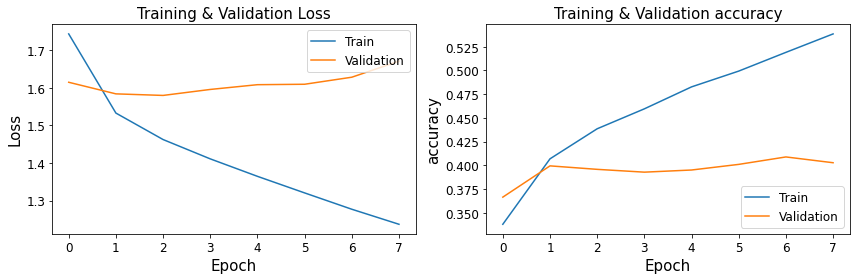

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(ann_scaled_history.history['loss'], label='Train')
plt.plot(ann_scaled_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(ann_scaled_history.history['accuracy'], label='Train')
plt.plot(ann_scaled_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = ann_scaled.predict(X_train_scaled)
val_preds = ann_scaled.predict(X_val_scaled)
pbtest_preds = ann_scaled.predict(X_pbtest_scaled)
pvtest_preds = ann_scaled.predict(X_pvtest_scaled)

print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of publictest_preds matrix: ', pbtest_preds.shape)
print('Shape of privatetest_preds matrix: ', pvtest_preds.shape)

Shape of train_preds matrix:  (22967, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of publictest_preds matrix:  (3589, 7)
Shape of privatetest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)
pvtest_preds_labels = np.argmax(pvtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, pvtest_preds_labels), accuracy_score(y_pvtest_le, pvtest_preds_labels)*100))

Accuracy on train dataset: 0.53673 (53.673%)
Accuracy on validation dataset: 0.58673 (58.673%)
Accuracy on public test dataset: 0.39342 (39.342%)
Accuracy on private test dataset: 0.41571 (41.571%)


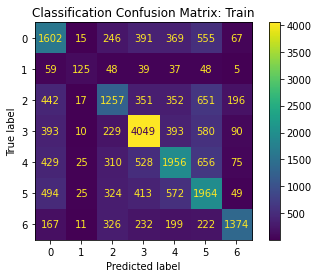

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

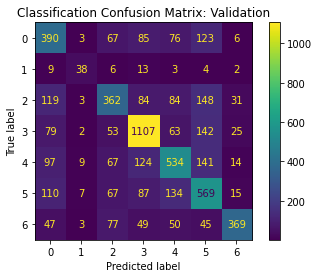

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

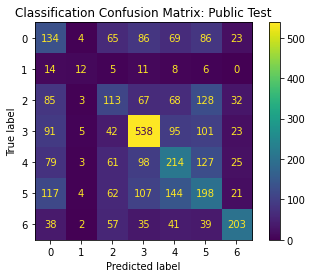

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()

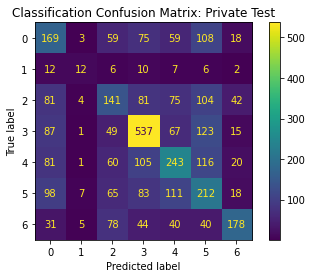

In [ ]:
cm.from_predictions(y_pvtest_le, pvtest_preds_labels)
plt.title('Classification Confusion Matrix: Private Test', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
ann_scaled_dict = {'Method':'Neural Network',
               'Accuracy': accuracy_score(y_pbtest_le, pbtest_preds_labels),
               'Precision': precision_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'Recall': recall_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, pbtest_preds_labels, average='weighted')}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/ann_scaled_dict', ann_scaled_dict, allow_pickle=True)

## ANN with Gabor Filter

In [ ]:
import numpy as np
X_train_ER = np.load('/content/drive/MyDrive/Data/Dataset/X_train_ER.npy', allow_pickle=True)
X_val_ER = np.load('/content/drive/MyDrive/Data/Dataset/X_val_ER.npy', allow_pickle=True)
X_pbtest_ER = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_ER.npy', allow_pickle=True)
X_pvtest_ER = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_ER.npy', allow_pickle=True)
y_train_c = np.load('/content/drive/MyDrive/Data/Dataset/y_train_c.npy', allow_pickle=True)
y_train_c_gb = y_train_c[:15000] #selecting the first 15k samples to limit the calculations

In [ ]:
print('shape of train :', X_train_ER.shape)
print('shape of val :', X_val_ER.shape)
print('shape of pbtest :', X_pbtest_ER.shape)
print('shape of pvtest :', X_pvtest_ER.shape, '\n')
print('shape of y_train :', y_train_c.shape)
print('shape of y_train_gb :', y_train_c_gb.shape)

shape of train : (15000, 48, 48, 4)
shape of val : (5742, 48, 48, 4)
shape of pbtest : (3589, 48, 48, 4)
shape of pvtest : (3589, 48, 48, 4) 

shape of y_train : (22967, 7)
shape of y_train_gb : (15000, 7)


In [ ]:
print('shape of train :', X_train_ER_R.shape)
print('shape of val :', X_val_ER_R.shape)
print('shape of pbtest :', X_pbtest_ER_R.shape)
print('shape of pvtest :', X_pvtest_ER_R.shape)

shape of train : (15000, 9216)
shape of val : (5742, 9216)
shape of pbtest : (3589, 9216)
shape of pvtest : (3589, 9216) 



In [ ]:
# Reshaping data for Dense layer
X_train_ER_R = np.reshape(X_train_ER, (15000,9216))
X_val_ER_R = np.reshape(X_val_ER, (5742,9216))
X_pbtest_ER_R = np.reshape(X_pbtest_ER, (3589,9216))
X_pvtest_ER_R = np.reshape(X_pvtest_ER, (3589,9216))

In [ ]:
# MODEL 1: 1 HIDDEN LAYER, 100 NODES

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD


callback = [
        EarlyStopping(monitor='val_loss', patience=5, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='val_loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
ann_gb = Sequential()
ann_gb.add(Dense(100, input_shape=(9216,) ,activation='relu'))
ann_gb.add(Dense(7, activation = 'softmax'))
ann_gb.compile(loss = "categorical_crossentropy", optimizer = sgd , metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
ann_gb.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 100)               921700    
                                                                 
 dense_23 (Dense)            (None, 7)                 707       
                                                                 
Total params: 922,407
Trainable params: 922,407
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import time
start = time.time()
ann_gb_history = ann_gb.fit(X_train_ER_R,y_train_c_gb,
                                          batch_size=128, epochs=50, verbose=1,
                                          validation_data=(X_val_ER_R, y_val_c),
                                          callbacks=callback)

end = time.time()
print('Run time: ', end-start,'s')

Epoch 1/50
117/118 [============================>.] - ETA: 0s - loss: 2.5933 - accuracy: 0.1842
Epoch 1: val_loss improved from inf to 2.41164, saving model to ./best_weights.h5
118/118 [==============================] - 4s 33ms/step - loss: 2.5926 - accuracy: 0.1841 - val_loss: 2.4116 - val_accuracy: 0.1651
Epoch 2/50
116/118 [============================>.] - ETA: 0s - loss: 1.9154 - accuracy: 0.2292
Epoch 2: val_loss improved from 2.41164 to 2.07591, saving model to ./best_weights.h5
118/118 [==============================] - 3s 27ms/step - loss: 1.9162 - accuracy: 0.2291 - val_loss: 2.0759 - val_accuracy: 0.1848
Epoch 3/50
116/118 [============================>.] - ETA: 0s - loss: 1.8034 - accuracy: 0.2794
Epoch 3: val_loss did not improve from 2.07591
118/118 [==============================] - 3s 27ms/step - loss: 1.8032 - accuracy: 0.2796 - val_loss: 2.0776 - val_accuracy: 0.2062
Epoch 4/50
118/118 [==============================] - ETA: 0s - loss: 1.6616 - accuracy: 0.3506
Epoch

In [ ]:
from tensorflow.keras.models import save_model, load_model
import tensorflow as tf

tf.keras.models.save_model(ann_gb,"/content/drive/MyDrive/Models/ann_gb.h5")

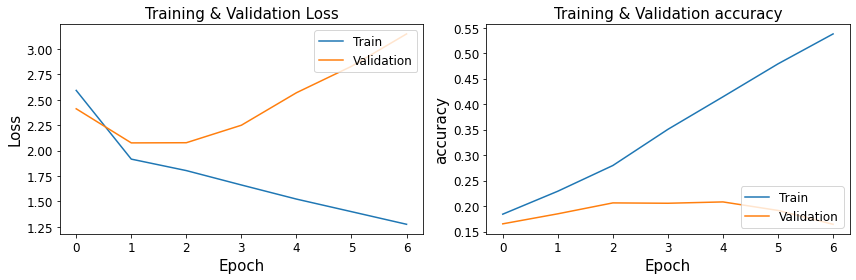

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
# Plot training & validation loss values
plt.plot(ann_gb_history.history['loss'], label='Train')
plt.plot(ann_gb_history.history['val_loss'], label='Validation')
plt.title('Training & Validation Loss', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='upper right', fontsize=12)

plt.subplot(1,2,2)
# Plot training & validation accuracy values
plt.plot(ann_gb_history.history['accuracy'], label='Train')
plt.plot(ann_gb_history.history['val_accuracy'], label='Validation')
plt.title('Training & Validation accuracy', fontsize=15)
plt.ylabel('accuracy', fontsize=15)

plt.xlabel('Epoch', fontsize=15)
plt.xticks( fontsize=12)
plt.yticks( fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
train_preds = ann_gb.predict(X_train_ER_R)
val_preds = ann_gb.predict(X_val_ER_R)
pbtest_preds = ann_gb.predict(X_pbtest_ER_R)
pvtest_preds = ann_gb.predict(X_pvtest_ER_R)

print('Shape of train_preds matrix: ', train_preds.shape)
print('Shape of val_preds matrix: ', val_preds.shape)
print('Shape of publictest_preds matrix: ', pbtest_preds.shape)
print('Shape of privatetest_preds matrix: ', pvtest_preds.shape)

Shape of train_preds matrix:  (15000, 7)
Shape of val_preds matrix:  (5742, 7)
Shape of publictest_preds matrix:  (3589, 7)
Shape of privatetest_preds matrix:  (3589, 7)


In [ ]:
train_preds_labels = np.argmax(train_preds,axis=1)
val_preds_labels = np.argmax(val_preds, axis=1)
pbtest_preds_labels = np.argmax(pbtest_preds, axis=1)
pvtest_preds_labels = np.argmax(pvtest_preds, axis=1)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le_epca, train_preds_labels), accuracy_score(y_train_le_epca, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, pvtest_preds_labels), accuracy_score(y_pvtest_le, pvtest_preds_labels)*100))

Accuracy on train dataset: 0.63873 (63.873%)
Accuracy on validation dataset: 0.16423 (16.423%)
Accuracy on public test dataset: 0.17359 (17.359%)
Accuracy on private test dataset: 0.16690 (16.690%)


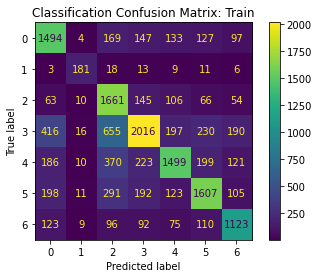

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le_epca, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

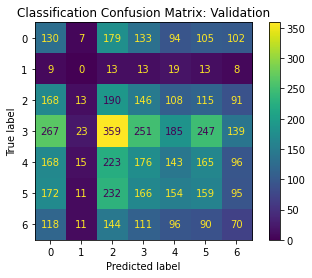

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

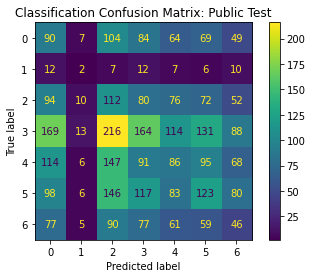

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()

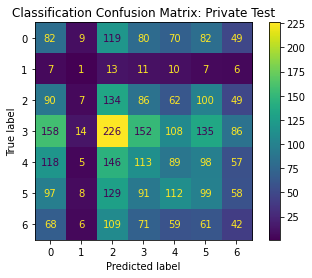

In [ ]:
cm.from_predictions(y_pvtest_le, pvtest_preds_labels)
plt.title('Classification Confusion Matrix: Private Test', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
ann_gb_dict = {'Method':'Neural Network-Gabor',
               'Accuracy': accuracy_score(y_pbtest_le, pbtest_preds_labels),
               'Precision': precision_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'Recall': recall_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, pbtest_preds_labels, average='weighted')}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/ann_gb_dict', ann_gb_dict, allow_pickle=True)

# TRAINED MODELS: 3 KNN

## KNN SCALED

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, recall_score, roc_auc_score


#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#create new a knn model
estimator = KNeighborsClassifier()
knn_search = GridSearchCV(estimator, param_grid, cv=10)
knn_search.fit(X_train_scaled,y_train_le)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
knn_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# Get the best model
best_model = knn_search.best_estimator_

best_model.fit(X_train_scaled,y_train_le)

# Calculate cross-validation accuracy
print('Cross-validation Accuracy on training set: {:.3f}'.format(cross_val_score(best_model,X_train_scaled,y_train_le,cv=10).mean()))

Cross-validation Accuracy on training set: 0.372


In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/Models/knn_model.pkl')

['/content/drive/MyDrive/Models/knn_model.pkl']

In [ ]:
import joblib
best_model = joblib.load('/content/drive/MyDrive/Models/knn_model.pkl')

In [ ]:
train_preds_labels = best_model.predict(X_train_scaled)
val_preds_labels = best_model.predict(X_val_scaled)
pbtest_preds_labels = best_model.predict(X_pbtest_scaled)
pvtest_preds_labels = best_model.predict(X_pvtest_scaled)

print('Shape of train_preds matrix: ', train_preds_labels.shape)
print('Shape of val_preds matrix: ', val_preds_labels.shape)
print('Shape of publictest_preds matrix: ', pbtest_preds_labels.shape)
print('Shape of privatetest_preds matrix: ', pvtest_preds_labels.shape)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, train_preds_labels), accuracy_score(y_train_le, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, pvtest_preds_labels), accuracy_score(y_pvtest_le, pvtest_preds_labels)*100))

Accuracy on train dataset: 0.48247 (48.247%)
Accuracy on validation dataset: 0.32288 (32.288%)
Accuracy on public test dataset: 0.31680 (31.680%)
Accuracy on private test dataset: 0.33268 (33.268%)


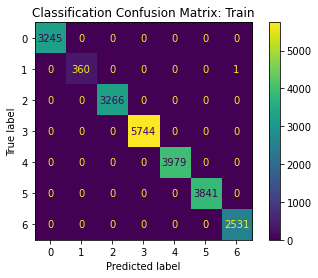

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

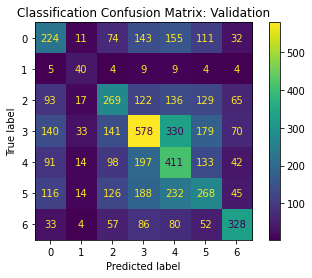

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

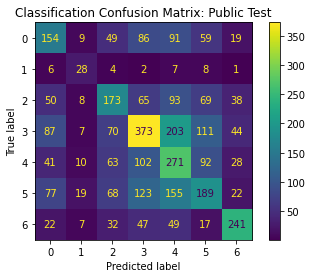

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()

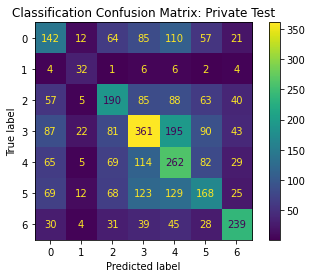

In [ ]:
cm.from_predictions(y_pvtest_le, pvtest_preds_labels)
plt.title('Classification Confusion Matrix: Private Test', fontsize=12)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
knn_scaled_dict = {'Method':'K-Nearest Neighbors',
               'Accuracy': accuracy_score(y_pbtest_le, pbtest_preds_labels),
               'Precision': precision_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'Recall': recall_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, pbtest_preds_labels, average='weighted')}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/knn_scaled_dict', knn_scaled_dict, allow_pickle=True)

## KNN GF/PCA

In [ ]:
import numpy as np

X_pbtest_epca = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_epca_scaled.npy', allow_pickle=True)
X_pvtest_epca = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_epca_scaled.npy', allow_pickle=True)
X_train_epca = np.load('/content/drive/MyDrive/Data/Dataset/X_train_epca_scaled.npy', allow_pickle=True)
X_val_epca = np.load('/content/drive/MyDrive/Data/Dataset/X_val_epca_scaled.npy', allow_pickle=True)


In [ ]:
print('shape of X_train: ', X_train.shape)
print('shape of X_train_epca: ', X_train_epca.shape, '\n')
print('shape of X_train: ', X_val.shape)
print('shape of X_train_epca: ', X_val_epca.shape, '\n')
print('shape of X_train: ', X_pbtest.shape)
print('shape of X_train_epca: ', X_pbtest_epca.shape, '\n')
print('shape of X_train: ', X_pvtest.shape)
print('shape of X_train_epca: ', X_pvtest_epca.shape, '\n')

shape of X_train:  (22967, 2304)
shape of X_train_epca:  (15000, 631) 

shape of X_train:  (5742, 2304)
shape of X_train_epca:  (5742, 631) 

shape of X_train:  (3589, 2304)
shape of X_train_epca:  (3589, 631) 

shape of X_train:  (3589, 2304)
shape of X_train_epca:  (3589, 631) 



(array([  1.,   0.,   0.,   2.,   6., 139., 446.,  31.,   4.,   2.]),
 array([-75.91078894, -63.75061496, -51.59044098, -39.430267  ,
        -27.27009302, -15.10991904,  -2.94974506,   9.21042892,
         21.3706029 ,  33.53077688,  45.69095086]),
 <a list of 10 Patch objects>)

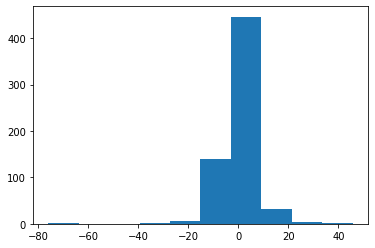

In [ ]:
# Data inspection. It should be scaled
import matplotlib.pyplot as plt

plt.hist(X_train_epca[0])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_epca_scaled = scaler.fit_transform(X_train_epca)
X_val_epca_scaled = scaler.transform(X_val_epca)
X_pbtest_epca_scaled = scaler.transform(X_pbtest_epca)
X_pvtest_epca_scaled = scaler.transform(X_pvtest_epca)

(array([  2.,   6.,  24.,  80., 138., 170., 128.,  58.,  17.,   8.]),
 array([-2.2970761 , -1.86673835, -1.43640061, -1.00606286, -0.57572512,
        -0.14538737,  0.28495038,  0.71528812,  1.14562587,  1.57596362,
         2.00630136]),
 <a list of 10 Patch objects>)

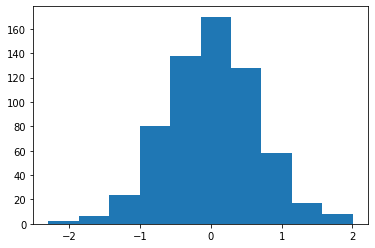

In [ ]:
#Scaled
import matplotlib.pyplot as plt

plt.hist(X_train_epca_scaled[0])

In [ ]:
import numpy as np

np.save('/content/drive/MyDrive/Data/Dataset/X_train_epca_scaled.npy', X_train_epca_scaled, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/X_val_epca_scaled.npy', X_val_epca_scaled, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/X_pbtest_epca_scaled.npy', X_pbtest_epca_scaled, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/X_pvtest_epca_scaled.npy', X_pvtest_epca_scaled, allow_pickle=True)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, average_precision_score, precision_score, recall_score, roc_auc_score


#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 10)}

#create new a knn model
estimator = KNeighborsClassifier()
knn_search = GridSearchCV(estimator, param_grid, cv=10)
y_train_le_epca = y_train_le[:15000]
knn_search.fit(X_train_epca_scaled,y_train_le)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [ ]:
knn_search.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
# Get the best model
best_model = knn_search.best_estimator_

best_model.fit(X_train_epca_scaled,y_train_le_epca)

# Calculate cross-validation accuracy
print('Cross-validation Accuracy on training set: {:.3f}'.format(cross_val_score(best_model,X_train_epca_scaled,y_train_le_epca,cv=10).mean()))

Cross-validation Accuracy on training set: 0.247


In [ ]:
import joblib
joblib.dump(best_model, '/content/drive/MyDrive/Models/knn_epca_model.pkl')

['/content/drive/MyDrive/Models/knn_epca_model.pkl']

In [ ]:
import joblib
best_model = joblib.load('/content/drive/MyDrive/Models/knn_epca_model.pkl')

In [ ]:
train_preds_labels = best_model.predict(X_train_epca_scaled)
val_preds_labels = best_model.predict(X_val_epca_scaled)
pbtest_preds_labels = best_model.predict(X_pbtest_epca_scaled)
pvtest_preds_labels = best_model.predict(X_pvtest_epca_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le_epca, train_preds_labels), accuracy_score(y_train_le_epca, train_preds_labels)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, val_preds_labels), accuracy_score(y_val_le, val_preds_labels)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, pbtest_preds_labels), accuracy_score(y_pbtest_le, pbtest_preds_labels)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, pvtest_preds_labels), accuracy_score(y_pvtest_le, pvtest_preds_labels)*100))

Accuracy on train dataset: 0.36880 (36.880%)
Accuracy on validation dataset: 0.18321 (18.321%)
Accuracy on public test dataset: 0.18835 (18.835%)
Accuracy on private test dataset: 0.18835 (18.835%)


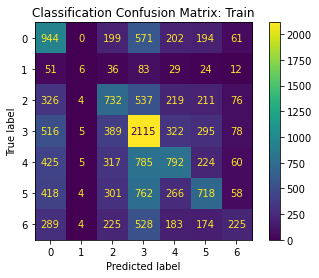

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le_epca, train_preds_labels)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

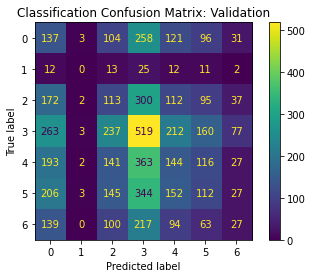

In [ ]:
cm.from_predictions(y_val_le, val_preds_labels)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

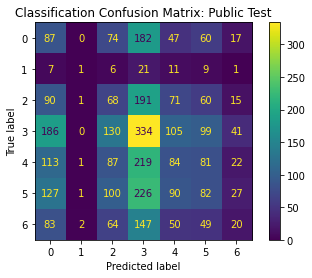

In [ ]:
cm.from_predictions(y_pbtest_le, pbtest_preds_labels)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()

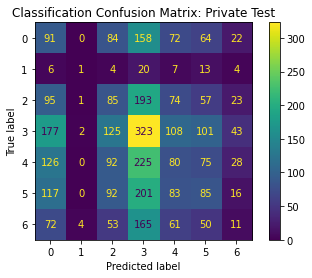

In [ ]:
cm.from_predictions(y_pvtest_le, pvtest_preds_labels)
plt.title('Classification Confusion Matrix: Private Test', fontsize=12)
plt.show()

In [ ]:
train_preds_labels = best_model.predict(X_train_epca_scaled)
val_preds_labels = best_model.predict(X_val_epca_scaled)
pbtest_preds_labels = best_model.predict(X_pbtest_epca_scaled)
pvtest_preds_labels = best_model.predict(X_pvtest_epca_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
knn_epca_dict = {'Method':'K-Nearest Neighbors-EPCA',
               'Accuracy': accuracy_score(y_pbtest_le, pbtest_preds_labels),
               'Precision': precision_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'Recall': recall_score(y_pbtest_le, pbtest_preds_labels, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, pbtest_preds_labels, average='weighted')}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/knn_epca_dict', knn_epca_dict, allow_pickle=True)

# TRAINED MODELS: 4 Random Forest

## Random Forest Scaled data

In [ ]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/Data/Dataset/X_train.npy', allow_pickle=True)
X_train_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_train_scaled.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Data/Dataset/y_train.npy', allow_pickle=True)
y_train_c = np.load('/content/drive/MyDrive/Data/Dataset/y_train_c.npy', allow_pickle=True)
y_train_le = np.load('/content/drive/MyDrive/Data/Dataset/y_train_le.npy', allow_pickle=True)

X_val = np.load('/content/drive/MyDrive/Data/Dataset/X_val.npy', allow_pickle=True)
X_val_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_val_scaled.npy', allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/Data/Dataset/y_val.npy', allow_pickle=True)
y_val_c = np.load('/content/drive/MyDrive/Data/Dataset/y_val_c.npy', allow_pickle=True)
y_val_le = np.load('/content/drive/MyDrive/Data/Dataset/y_val_le.npy', allow_pickle=True)

X_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest.npy', allow_pickle=True)
X_pbtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_scaled.npy', allow_pickle=True)
y_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest.npy', allow_pickle=True)
y_pbtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_c.npy', allow_pickle=True)
y_pbtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_le.npy', allow_pickle=True)

X_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest.npy', allow_pickle=True)
X_pvtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_scaled.npy', allow_pickle=True)
y_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest.npy', allow_pickle=True)
y_pvtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_c.npy', allow_pickle=True)
y_pvtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_le.npy', allow_pickle=True)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

hyperparameter_set = {'n_estimators': [100, 300, 500],
                      'max_features': ['auto', 'sqrt']}

estimator = RandomForestClassifier() 
rf_rnd_search = RandomizedSearchCV(estimator = estimator,
                                      param_distributions = hyperparameter_set,
                                      n_jobs=-1,
                                      cv=10,
                                      random_state=42,
                                      return_train_score=True)
rf_rnd_search.fit(X_train_scaled, y_train_le)

In [ ]:
rf_best_model = rf_rnd_search.best_estimator_

In [ ]:
rf_rnd_search_df = pd.DataFrame(rf_rnd_search.cv_results_)

In [ ]:
rf_rnd_search_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,100.572836,2.241272,0.159713,0.006225,100,auto,"{'n_estimators': 100, 'max_features': 'auto'}",0.425773,0.436657,0.464519,...,0.998549,0.998597,0.998645,0.998549,0.998645,0.998645,0.998694,0.998742,0.998631,0.000065
1,296.885515,1.589255,0.450394,0.014326,300,auto,"{'n_estimators': 300, 'max_features': 'auto'}",0.438398,0.456247,0.468002,...,0.998549,0.998597,0.998645,0.998597,0.998645,0.998645,0.998694,0.998742,0.998636,0.000060
2,493.072273,3.062771,0.720792,0.039921,500,auto,"{'n_estimators': 500, 'max_features': 'auto'}",0.434044,0.448846,0.482368,...,0.998549,0.998597,0.998645,0.998597,0.998645,0.998645,0.998694,0.998742,0.998636,0.000060
3,99.512670,0.455046,0.163253,0.007495,100,sqrt,"{'n_estimators': 100, 'max_features': 'sqrt'}",0.421419,0.439704,0.475838,...,0.998549,0.998597,0.998645,0.998597,0.998645,0.998645,0.998694,0.998742,0.998636,0.000060
4,301.790768,6.686750,0.473160,0.021470,300,sqrt,"{'n_estimators': 300, 'max_features': 'sqrt'}",0.442316,0.447976,0.481498,...,0.998549,0.998597,0.998645,0.998597,0.998645,0.998645,0.998694,0.998742,0.998636,0.000060
5,497.602310,4.423996,0.767205,0.046384,500,sqrt,"{'n_estimators': 500, 'max_features': 'sqrt'}",0.438398,0.453200,0.487593,...,0.998549,0.998597,0.998645,0.998597,0.998645,0.998645,0.998694,0.998742,0.998636,0.000060


In [ ]:
rf_best_model

RandomForestClassifier(max_features='sqrt', n_estimators=300)

In [ ]:
import joblib
joblib.dump(rf_best_model, 'rf_best_model_jb.pkl')

In [ ]:
import joblib
rf_best_model = joblib.load('/content/drive/MyDrive/Models/rf_best_model_jb.pkl')

In [ ]:
rf_BM_train_preds = rf_best_model.predict(X_train_scaled)
rf_BM_val_preds = rf_best_model.predict(X_val_scaled)
rf_BM_pbtest_preds = rf_best_model.predict(X_pbtest_scaled)
rf_BM_pvtest_preds = rf_best_model.predict(X_pvtest_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, rf_BM_train_preds), accuracy_score(y_train_le, rf_BM_train_preds)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, rf_BM_val_preds), accuracy_score(y_val_le, rf_BM_val_preds)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, rf_BM_pbtest_preds), accuracy_score(y_pbtest_le, rf_BM_pbtest_preds)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, rf_BM_pvtest_preds), accuracy_score(y_pvtest_le, rf_BM_pvtest_preds)*100))

Accuracy on train dataset: 0.99856 (99.856%)
Accuracy on validation dataset: 0.45890 (45.890%)
Accuracy on public test dataset: 0.46698 (46.698%)
Accuracy on private test dataset: 0.46392 (46.392%)


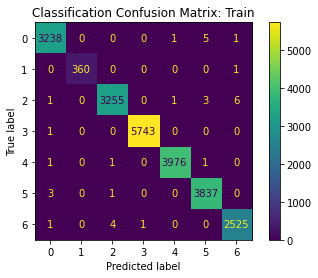

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, rf_BM_train_preds)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

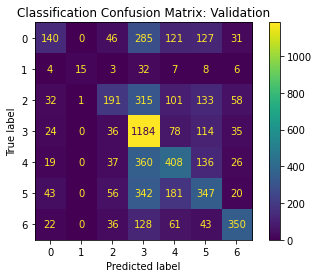

In [ ]:
cm.from_predictions(y_val_le, rf_BM_val_preds)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

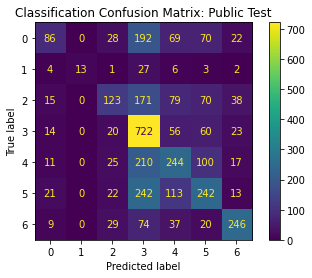

In [ ]:
cm.from_predictions(y_pbtest_le, rf_BM_pbtest_preds)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()


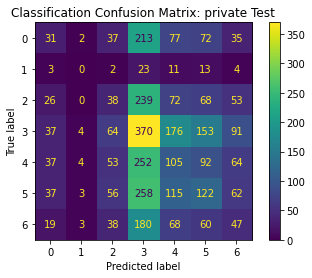

In [ ]:
cm.from_predictions(y_pbtest_le, rf_BM_pvtest_preds)
plt.title('Classification Confusion Matrix: private Test', fontsize=12)
plt.show()


In [ ]:
rf_BM_train_preds = rf_best_model.predict(X_train_scaled)
rf_BM_val_preds = rf_best_model.predict(X_val_scaled)
rf_BM_pbtest_preds = rf_best_model.predict(X_pbtest_scaled)
rf_BM_pvtest_preds = rf_best_model.predict(X_pvtest_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_scaled_dict = {'Method':'Random Forest',
               'Accuracy': accuracy_score(y_pbtest_le, rf_BM_pbtest_preds),
               'Precision': precision_score(y_pbtest_le, rf_BM_pbtest_preds, average='weighted'),
               'Recall': recall_score(y_pbtest_le, rf_BM_pbtest_preds, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, rf_BM_pbtest_preds, average='weighted')}

In [ ]:
rf_scaled_dict

{'Accuracy': 0.46698244636388964,
 'F1-Score': 0.44319711689658836,
 'Method': 'Random Forest',
 'Precision': 0.4890536721540649,
 'Recall': 0.46698244636388964}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/rf_scaled_dict', rf_scaled_dict, allow_pickle=True)

## Random Forest GF/PCA

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

X_pbtest_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_pbtest.npy', allow_pickle=True)
X_pvtest_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_pvtest.npy', allow_pickle=True)
X_train_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_train.npy', allow_pickle=True)
X_val_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_val.npy', allow_pickle=True)


In [ ]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/Data/Dataset/X_train.npy', allow_pickle=True)
X_train_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_train_scaled.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Data/Dataset/y_train.npy', allow_pickle=True)
y_train_c = np.load('/content/drive/MyDrive/Data/Dataset/y_train_c.npy', allow_pickle=True)
y_train_le = np.load('/content/drive/MyDrive/Data/Dataset/y_train_le.npy', allow_pickle=True)

X_val = np.load('/content/drive/MyDrive/Data/Dataset/X_val.npy', allow_pickle=True)
X_val_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_val_scaled.npy', allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/Data/Dataset/y_val.npy', allow_pickle=True)
y_val_c = np.load('/content/drive/MyDrive/Data/Dataset/y_val_c.npy', allow_pickle=True)
y_val_le = np.load('/content/drive/MyDrive/Data/Dataset/y_val_le.npy', allow_pickle=True)

X_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest.npy', allow_pickle=True)
X_pbtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_scaled.npy', allow_pickle=True)
y_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest.npy', allow_pickle=True)
y_pbtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_c.npy', allow_pickle=True)
y_pbtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_le.npy', allow_pickle=True)

X_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest.npy', allow_pickle=True)
X_pvtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_scaled.npy', allow_pickle=True)
y_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest.npy', allow_pickle=True)
y_pvtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_c.npy', allow_pickle=True)
y_pvtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_le.npy', allow_pickle=True)


In [ ]:
# selecting first 15k
y_train_le_epca = y_train_le[:15000]

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_epca = RandomForestClassifier()
rf_epca.fit(X_train_epca_scaled, y_train_le_epca)

RandomForestClassifier()

In [ ]:
rf_epca_train_preds = rf_epca.predict(X_train_epca_scaled)
rf_epca_val_preds = rf_epca.predict(X_val_epca_scaled)
rf_epca_pbtest_preds = rf_epca.predict(X_pbtest_epca_scaled)
rf_epca_pvtest_preds = rf_epca.predict(X_pvtest_epca_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le_epca, rf_epca_train_preds), accuracy_score(y_train_le_epca, rf_epca_train_preds)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, rf_epca_val_preds), accuracy_score(y_val_le, rf_epca_val_preds)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, rf_epca_pbtest_preds), accuracy_score(y_pbtest_le, rf_epca_pbtest_preds)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, rf_epca_pvtest_preds), accuracy_score(y_pvtest_le, rf_epca_pvtest_preds)*100))

Accuracy on train dataset: 0.98047 (98.047%)
Accuracy on validation dataset: 0.22832 (22.832%)
Accuracy on public test dataset: 0.22625 (22.625%)
Accuracy on private test dataset: 0.22290 (22.290%)


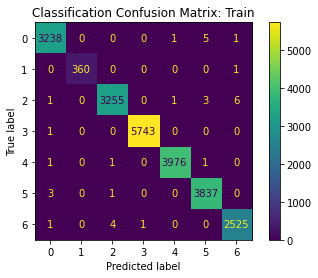

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le_epca, rf_BM_train_preds)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

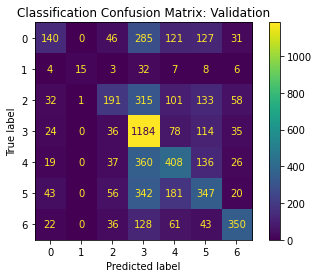

In [ ]:
cm.from_predictions(y_val_le, rf_BM_val_preds)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

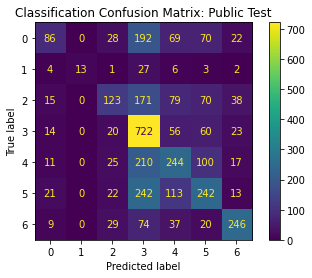

In [ ]:
cm.from_predictions(y_pbtest_le, rf_BM_pbtest_preds)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()


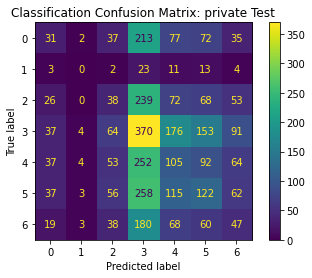

In [ ]:
cm.from_predictions(y_pbtest_le, rf_BM_pvtest_preds)
plt.title('Classification Confusion Matrix: private Test', fontsize=12)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
rf_epca_dict = {'Method':'Random Forest-EPCA',
               'Accuracy': accuracy_score(y_pbtest_le, rf_epca_pbtest_preds),
               'Precision': precision_score(y_pbtest_le, rf_epca_pbtest_preds, average='weighted'),
               'Recall': recall_score(y_pbtest_le, rf_epca_pbtest_preds, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, rf_epca_pbtest_preds, average='weighted')}

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/rf_epca_dict', rf_epca_dict, allow_pickle=True)

# TRAIN MODELS: 5 SVM

## SVM SCALED DATA

In [ ]:
from sklearn.svm import SVC

svm_scaled = SVC()
svm_scaled.fit(X_train_scaled, y_train_le)

SVC()

In [ ]:
import joblib
joblib.dump(svm_scaled, '/content/drive/MyDrive/Models/svm_scaled_model.pkl')

['/content/drive/MyDrive/Models/svm_scaled_model.pkl']

In [ ]:
import joblib
svm_scaled = joblib.load('/content/drive/MyDrive/Models/svm_scaled_model.pkl')


In [ ]:
svm_scaled_train_preds = svm_scaled.predict(X_train_scaled)
svm_scaled_val_preds = svm_scaled.predict(X_val_scaled)
svm_scaled_pbtest_preds = svm_scaled.predict(X_pbtest_scaled)
svm_scaled_pvtest_preds = svm_scaled.predict(X_pvtest_scaled)

In [ ]:
np.save('/content/drive/MyDrive/Data/Dataset/svm_scaled_train_preds', svm_scaled_train_preds, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/svm_scaled_val_preds', svm_scaled_val_preds, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/svm_scaled_pbtest_preds', svm_scaled_pbtest_preds, allow_pickle=True)
np.save('/content/drive/MyDrive/Data/Dataset/svm_scaled_pvtest_preds', svm_scaled_pvtest_preds, allow_pickle=True)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le, svm_scaled_train_preds), accuracy_score(y_train_le, svm_scaled_train_preds)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, svm_scaled_val_preds), accuracy_score(y_val_le, svm_scaled_val_preds)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, svm_scaled_pbtest_preds), accuracy_score(y_pbtest_le, svm_scaled_pbtest_preds)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, svm_scaled_pvtest_preds), accuracy_score(y_pvtest_le, svm_scaled_pvtest_preds)*100))

Accuracy on train dataset: 0.64101 (64.101%)
Accuracy on validation dataset: 0.43469 (43.469%)
Accuracy on public test dataset: 0.44497 (44.497%)
Accuracy on private test dataset: 0.43578 (43.578%)


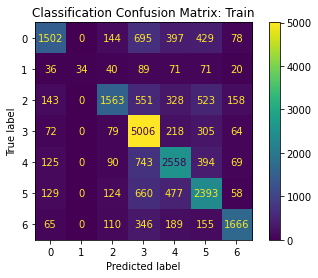

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le, svm_scaled_train_preds)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

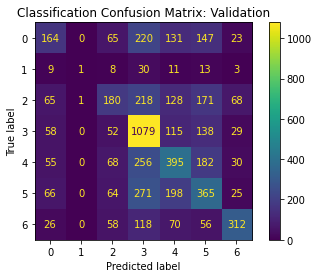

In [ ]:
cm.from_predictions(y_val_le, svm_scaled_val_preds)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

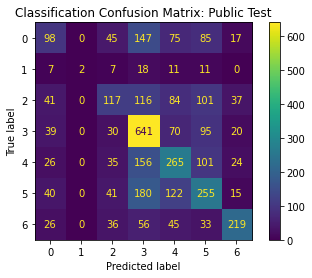

In [ ]:
cm.from_predictions(y_pbtest_le, svm_scaled_pbtest_preds)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()


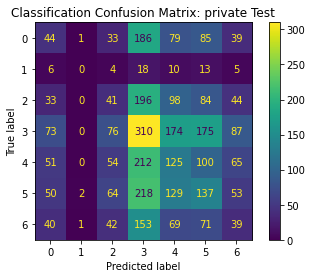

In [ ]:
cm.from_predictions(y_pbtest_le, svm_scaled_pvtest_preds)
plt.title('Classification Confusion Matrix: private Test', fontsize=12)
plt.show()


In [ ]:
svm_scaled_train_preds = np.load('/content/drive/MyDrive/Data/Dataset/svm_scaled_train_preds.npy', allow_pickle=True)
svm_scaled_val_preds = np.load('/content/drive/MyDrive/Data/Dataset/svm_scaled_val_preds.npy', allow_pickle=True)
svm_scaled_pbtest_preds = np.load('/content/drive/MyDrive/Data/Dataset/svm_scaled_pbtest_preds.npy', allow_pickle=True)
svm_scaled_pvtest_preds = np.load('/content/drive/MyDrive/Data/Dataset/svm_scaled_pvtest_preds.npy', allow_pickle=True)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
svm_scaled_dict = {'Method':'Support Vector Machine',
               'Accuracy': accuracy_score(y_pbtest_le, svm_scaled_pbtest_preds),
               'Precision': precision_score(y_pbtest_le, svm_scaled_pbtest_preds, average='weighted'),
               'Recall': recall_score(y_pbtest_le, svm_scaled_pbtest_preds, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, svm_scaled_pbtest_preds, average='weighted')}

In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/svm_scaled_dict', svm_scaled_dict, allow_pickle=True)

## SVM GF/PCA DATA

In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

X_pbtest_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_pbtest.npy', allow_pickle=True)
X_pvtest_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_pvtest.npy', allow_pickle=True)
X_train_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_train.npy', allow_pickle=True)
X_val_epca_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_features_extracted_pca_val.npy', allow_pickle=True)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np

X_train = np.load('/content/drive/MyDrive/Data/Dataset/X_train.npy', allow_pickle=True)
X_train_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_train_scaled.npy', allow_pickle=True)
y_train = np.load('/content/drive/MyDrive/Data/Dataset/y_train.npy', allow_pickle=True)
y_train_c = np.load('/content/drive/MyDrive/Data/Dataset/y_train_c.npy', allow_pickle=True)
y_train_le = np.load('/content/drive/MyDrive/Data/Dataset/y_train_le.npy', allow_pickle=True)

X_val = np.load('/content/drive/MyDrive/Data/Dataset/X_val.npy', allow_pickle=True)
X_val_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_val_scaled.npy', allow_pickle=True)
y_val = np.load('/content/drive/MyDrive/Data/Dataset/y_val.npy', allow_pickle=True)
y_val_c = np.load('/content/drive/MyDrive/Data/Dataset/y_val_c.npy', allow_pickle=True)
y_val_le = np.load('/content/drive/MyDrive/Data/Dataset/y_val_le.npy', allow_pickle=True)

X_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest.npy', allow_pickle=True)
X_pbtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pbtest_scaled.npy', allow_pickle=True)
y_pbtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest.npy', allow_pickle=True)
y_pbtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_c.npy', allow_pickle=True)
y_pbtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pbtest_le.npy', allow_pickle=True)

X_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest.npy', allow_pickle=True)
X_pvtest_scaled = np.load('/content/drive/MyDrive/Data/Dataset/X_pvtest_scaled.npy', allow_pickle=True)
y_pvtest = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest.npy', allow_pickle=True)
y_pvtest_c = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_c.npy', allow_pickle=True)
y_pvtest_le = np.load('/content/drive/MyDrive/Data/Dataset/y_pvtest_le.npy', allow_pickle=True)
y_train_le_epca = y_train_le[:15000]


In [ ]:
# skipping grid search due to limitations. It will take more than 10 hours.
from sklearn.svm import SVC

svm_epca = SVC()
svm_epca.fit(X_train_epca_scaled, y_train_le_epca)

SVC()

In [ ]:
svm_train_epca_preds = svm_epca.predict(X_train_epca_scaled)
svm_val_epca_preds = svm_epca.predict(X_val_epca_scaled)
svm_pbtest_epca_preds = svm_epca.predict(X_pbtest_epca_scaled)
svm_pvtest_epca_preds = svm_epca.predict(X_pvtest_epca_scaled)

In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy on train dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_train_le_epca, svm_train_epca_preds), accuracy_score(y_train_le_epca, svm_train_epca_preds)*100))
print('Accuracy on validation dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_val_le, svm_val_epca_preds), accuracy_score(y_val_le, svm_val_epca_preds)*100))
print('Accuracy on public test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pbtest_le, svm_pbtest_epca_preds), accuracy_score(y_pbtest_le, svm_pbtest_epca_preds)*100))
print('Accuracy on private test dataset: {:.5f} ({:.3f}%)'
  .format(accuracy_score(y_pvtest_le, svm_pvtest_epca_preds), accuracy_score(y_pvtest_le, svm_pvtest_epca_preds)*100))

Accuracy on train dataset: 0.58427 (58.427%)
Accuracy on validation dataset: 0.25444 (25.444%)
Accuracy on public test dataset: 0.24798 (24.798%)
Accuracy on private test dataset: 0.24380 (24.380%)


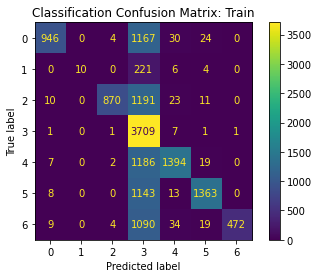

In [ ]:
#visualize classification confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay as cm

cm.from_predictions(y_train_le_epca, svm_train_epca_preds)
plt.title('Classification Confusion Matrix: Train', fontsize=12)
plt.show()

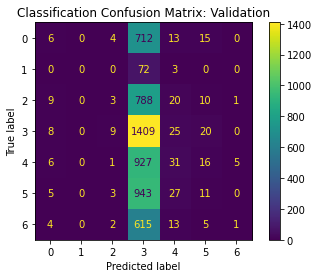

In [ ]:
cm.from_predictions(y_val_le, svm_val_epca_preds)
plt.title('Classification Confusion Matrix: Validation', fontsize=12)
plt.show()

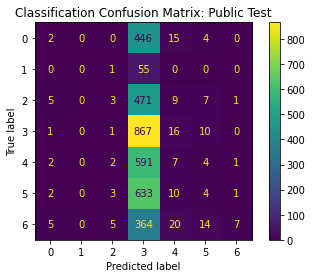

In [ ]:
cm.from_predictions(y_pbtest_le, svm_pbtest_epca_preds)
plt.title('Classification Confusion Matrix: Public Test', fontsize=12)
plt.show()


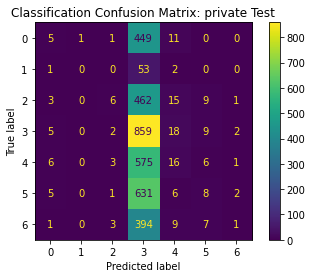

In [ ]:
cm.from_predictions(y_pbtest_le, svm_pvtest_epca_preds)
plt.title('Classification Confusion Matrix: private Test', fontsize=12)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
svm_epca_dict = {'Method':'Support Vector Machine',
               'Accuracy': accuracy_score(y_pbtest_le, svm_pbtest_epca_preds),
               'Precision': precision_score(y_pbtest_le, svm_pbtest_epca_preds, average='weighted'),
               'Recall': recall_score(y_pbtest_le, svm_pbtest_epca_preds, average='weighted'),
               'F1-Score': f1_score(y_pbtest_le, svm_pbtest_epca_preds, average='weighted')}

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import numpy as np
np.save('/content/drive/MyDrive/Data/Dics/svm_epca_dict', svm_epca_dict, allow_pickle=True)

# HYPERPARAM TUNING

## CNN

### Define model and hyperparams

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Flatten,BatchNormalization,Dropout
from tensorflow.keras.layers import PReLU
from sklearn.model_selection import GridSearchCV

from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

callback = [
        EarlyStopping(monitor='loss', patience=15, verbose=True),
        ModelCheckpoint('./best_weights.h5', monitor='loss', verbose=True, save_best_only=True,
                        save_weights_only=True)]

def create_model(learning_rate=0.01,optimizer='adam'):
  cnn_gabor_model= Sequential() # create Sequential model
  cnn_gabor_model.add(Conv2D(32, (1,1), input_shape=(48,48,4), padding='same', activation = 'relu')) 
  # block 1
  cnn_gabor_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
  cnn_gabor_model.add(PReLU())
  cnn_gabor_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
  cnn_gabor_model.add(PReLU())
  cnn_gabor_model.add(MaxPooling2D(pool_size=(2,2), strides=2))
  # block 2 
  cnn_gabor_model.add(Conv2D(64, (3,3), padding='same', activation = 'relu')) 
  cnn_gabor_model.add(PReLU())
  cnn_gabor_model.add(Conv2D(64, (5,5), padding='same', activation = 'relu')) 
  cnn_gabor_model.add(PReLU())
  cnn_gabor_model.add(MaxPooling2D(pool_size=(2,2), strides=2))

  # fc
  cnn_gabor_model.add(Flatten())
  cnn_gabor_model.add(Dense(2048, activation = 'relu')) 
  cnn_gabor_model.add(Dropout(0.2))
  cnn_gabor_model.add(Dense(1024, activation = 'relu')) 
  cnn_gabor_model.add(Dropout(0.5))
  cnn_gabor_model.add(Dense(7, activation = 'softmax'))

  if optimizer == 'SGD':
    optimizer= SGD(learning_rate)

  cnn_gabor_model.compile(loss = "categorical_crossentropy", optimizer = optimizer, metrics = ['accuracy'])

  return cnn_gabor_model

cnn_aug_model = KerasClassifier(build_fn=create_model, epochs=27, batch_size=128, verbose=0, callbacks=callback)
# cnn_aug_model = KerasClassifier(
#     build_fn=get_model,
#     n_features_in_=1000, 
#     X_shape=X.shape, 
#     n_classes_=2,
#     hidden_layer_dim=100,
# )

optimizer = ['SGD', 'Adam']
learning_rate=[0.1,0.01]
param_grid = dict(optimizer=optimizer,learning_rate=learning_rate)



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.


### Grid search

In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/drive/')
X_features_extracted_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_reshape.npy", allow_pickle=True)
# X_features_extracted_val_reshape = np.load("/content/drive/MyDrive/Data/X_features_extracted_val_reshape.npy", allow_pickle=True)

y_train_c = np.load("/content/drive/MyDrive/Data/y_train_c.npy", allow_pickle=True)
# y_val_c = np.load("/content/drive/MyDrive/Data/y_val_c.npy", allow_pickle=True)

# X = np.concatenate((X_features_extracted_reshape[0:15000], X_features_extracted_val_reshape), axis=0)
# y = np.concatenate((y_train_c[0:15000], y_val_c), axis=0)

# np.save("/content/drive/MyDrive/Data/X", X)
# np.save("/content/drive/MyDrive/Data/y", y)


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
X = np.load("/content/drive/MyDrive/Data/X.npy")
y = np.load("/content/drive/MyDrive/Data/y.npy")


In [ ]:
cnn_aug_grid = GridSearchCV(estimator=cnn_aug_model, param_grid=param_grid, n_jobs=1, cv=3)

In [ ]:

cnn_aug_grid_track = cnn_aug_grid.fit(X_features_extracted_reshape[0:15000], y_train_c[0:15000])



Epoch 1: loss improved from inf to 1.93794, saving model to ./best_weights.h5

Epoch 2: loss improved from 1.93794 to 1.62310, saving model to ./best_weights.h5

Epoch 3: loss improved from 1.62310 to 1.51739, saving model to ./best_weights.h5

Epoch 4: loss improved from 1.51739 to 1.40241, saving model to ./best_weights.h5

Epoch 5: loss improved from 1.40241 to 1.24496, saving model to ./best_weights.h5

Epoch 6: loss improved from 1.24496 to 1.01612, saving model to ./best_weights.h5

Epoch 7: loss improved from 1.01612 to 0.67983, saving model to ./best_weights.h5

Epoch 8: loss improved from 0.67983 to 0.41324, saving model to ./best_weights.h5

Epoch 9: loss improved from 0.41324 to 0.26480, saving model to ./best_weights.h5

Epoch 10: loss improved from 0.26480 to 0.18370, saving model to ./best_weights.h5

Epoch 11: loss improved from 0.18370 to 0.12116, saving model to ./best_weights.h5

Epoch 12: loss did not improve from 0.12116

Epoch 13: loss improved from 0.12116 to 0.1

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
6 fits failed out of a total of 12.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
6 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 236, in fit
    return super(KerasClassifier, self).fit(x, y, **kwargs)
  File "/usr/local/lib/python3.7/dist-packages/keras/wrappers/scikit_learn.py", line 155, in fit
    self.model = self.build_fn(**self.filter_sk_params(self.build_


Epoch 1: loss improved from inf to 1.88460, saving model to ./best_weights.h5

Epoch 2: loss improved from 1.88460 to 1.60908, saving model to ./best_weights.h5

Epoch 3: loss improved from 1.60908 to 1.45759, saving model to ./best_weights.h5

Epoch 4: loss improved from 1.45759 to 1.33591, saving model to ./best_weights.h5

Epoch 5: loss improved from 1.33591 to 1.21349, saving model to ./best_weights.h5

Epoch 6: loss improved from 1.21349 to 1.05692, saving model to ./best_weights.h5

Epoch 7: loss improved from 1.05692 to 0.84172, saving model to ./best_weights.h5

Epoch 8: loss improved from 0.84172 to 0.58159, saving model to ./best_weights.h5

Epoch 9: loss improved from 0.58159 to 0.39897, saving model to ./best_weights.h5

Epoch 10: loss improved from 0.39897 to 0.24754, saving model to ./best_weights.h5

Epoch 11: loss improved from 0.24754 to 0.18345, saving model to ./best_weights.h5

Epoch 12: loss improved from 0.18345 to 0.13496, saving model to ./best_weights.h5

Epoc

In [ ]:
cnn_aug_grid_track.best_estimator_.model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 48, 48, 32)        160       
                                                                 
 conv2d_61 (Conv2D)          (None, 48, 48, 64)        18496     
                                                                 
 p_re_lu_48 (PReLU)          (None, 48, 48, 64)        147456    
                                                                 
 conv2d_62 (Conv2D)          (None, 48, 48, 64)        102464    
                                                                 
 p_re_lu_49 (PReLU)          (None, 48, 48, 64)        147456    
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 24, 24, 64)       0         
 g2D)                                                            
                                                     

In [ ]:
# from tensorflow.keras.models import load_model
# from tensorflow.keras.models import save_model
# import tensorflow as tf
# import shutil

from joblib import dump, load


path="/content/drive/MyDrive/Models/cnn_aug_best.joblib"
dump(cnn_aug_grid_track.best_estimator_,path)



INFO:tensorflow:Assets written to: ram://ef2dc8aa-96fe-4810-b91c-1c12e20fe02b/assets


['/content/drive/MyDrive/Models/cnn_aug_best.joblib']

In [ ]:
cnn_aug_best = load("/content/drive/MyDrive/Models/cnn_aug_best.joblib")

# Deploy Gradio

In [ ]:
import tensorflow as tf
import gradio as gr

## Step 1: install gradio

In [ ]:
!pip install -q gradio

     |████████████████████████████████| 2.9 MB 9.9 MB/s 
     |████████████████████████████████| 212 kB 28.6 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 1.1 MB 65.0 MB/s 
     |████████████████████████████████| 54 kB 3.6 MB/s 
     |████████████████████████████████| 2.0 MB 61.8 MB/s 
     |████████████████████████████████| 253 kB 73.6 MB/s 
     |████████████████████████████████| 53 kB 2.4 MB/s 
     |████████████████████████████████| 94 kB 3.8 MB/s 
     |████████████████████████████████| 144 kB 75.6 MB/s 
     |████████████████████████████████| 271 kB 76.4 MB/s 
     |████████████████████████████████| 10.9 MB 7.7 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 80 kB 9.9 MB/s 
     |████████████████████████████████| 43 kB 2.0 MB/s 
     |████████████████████████████████| 4.0 MB 50.9 MB/s 
     |████████████████████████████████| 856 kB 47.8 MB/s 
     |███████████████████████

## Step 2: Load our own pre-trained model

In [ ]:
import keras
try:
  CNN_model_loaded = keras.models.load_model("CNN_model_Gradio")
  print("!!! Pre-trained Model loaded")
  CNN_model_loaded
except:
  print("!!! No pre-trained model found, please retraining your CNN model and save it")


!!! Pre-trained Model loaded


In [ ]:
### Load the normalization scaler
import joblib
try:
  neuralnet_scaler = joblib.load('neuralnet_scalar.gz')
  print("!!! Pre-trained Scaler loaded")
except:
  print("!!! No scaler model found, we need this scaler to normalize test data, please save your scaler first")

!!! Pre-trained Scaler loaded


In [ ]:
CNN_model_loaded

## Step 3: Re-evaluate our loaded model on the test set

In [ ]:
privatetest_features_scaled = neuralnet_scaler.transform(privatetest_features)

In [ ]:
privatetest_features_scaled_cnn = privatetest_features_scaled.reshape(len(privatetest_features_scaled), 48,48,1)

In [ ]:
###  Evaluate model on dataset
from sklearn.metrics import accuracy_score
## make prediction using loaded model 

pred=CNN_model_loaded.predict(privatetest_features_scaled_cnn)

pred_labels=np.argmax(pred,axis=1)
correct_privatetest=sum(pred_labels==privatetest_labels)
cnn_privatetest_accuracy=correct_privatetest/(len(privatetest_labels))
print("CNN_Private-Test_Accuracy: ",cnn_privatetest_accuracy)


CNN_Private-Test_Accuracy:  0.5157425466703818


In [ ]:
correct_labels_idx = np.where((pred_labels==privatetest_labels)==True)[0]

## Step 4: Generate testing examples for debugging

In [ ]:
def visualize_image(test_image, true_label=None, savefig='example1.png'):
  class_labels = {0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy', 4: 'Sad', 5:'Surprise', 6:'Neutral'}
  # reshape data into (48,48) for visualization
  test_image = test_image.reshape((48,48)).astype(float)

  # call matplotlib to visualize image

  import matplotlib.pyplot as plt
  plt.imshow(test_image, cmap = "gray")
  if true_label is not None:
    plt.title("Truelabel:"+class_labels[true_label])
  plt.axis("off")
  plt.savefig(savefig,dpi=300, bbox_inches='tight') # savefig can be 'example1.png'
  print("saving image to file ", savefig)
  
  plt.show()

saving image to file  example0.png


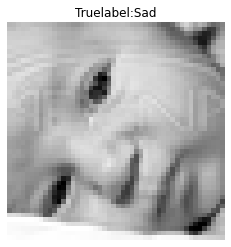

saving image to file  example1.png


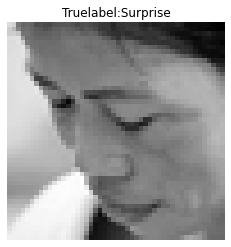

saving image to file  example2.png


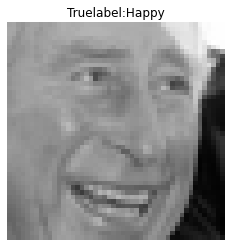

saving image to file  example3.png


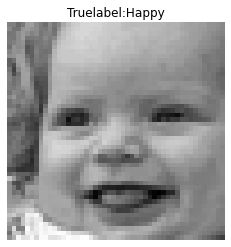

saving image to file  example4.png


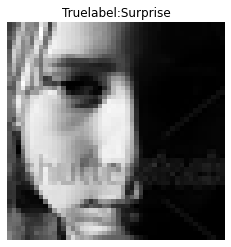

saving image to file  example5.png


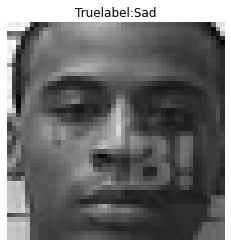

saving image to file  example6.png


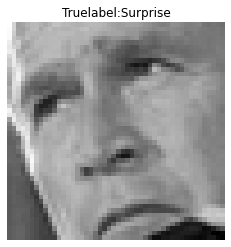

saving image to file  example7.png


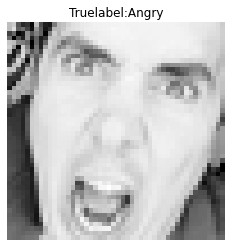

saving image to file  example8.png


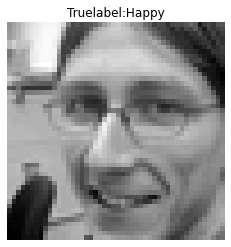

saving image to file  example9.png


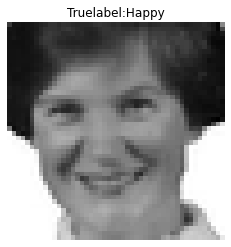

saving image to file  example10.png


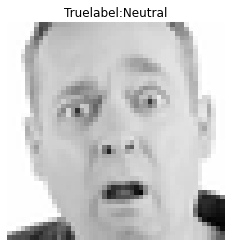

saving image to file  example11.png


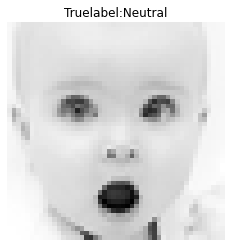

saving image to file  example12.png


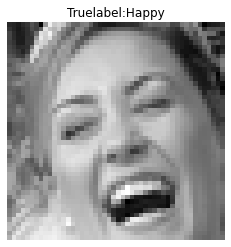

saving image to file  example13.png


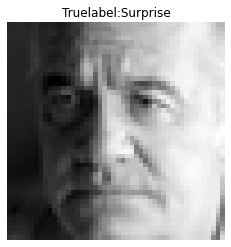

saving image to file  example14.png


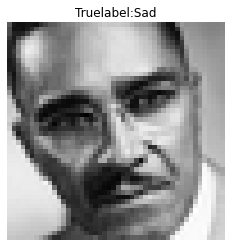

saving image to file  example15.png


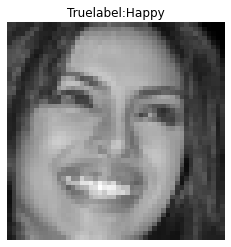

saving image to file  example16.png


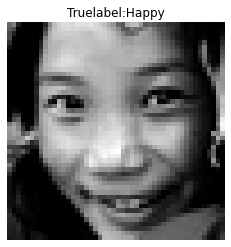

saving image to file  example17.png


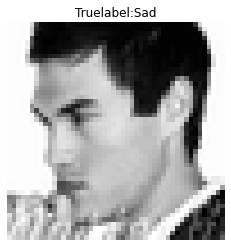

saving image to file  example18.png


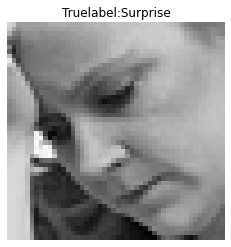

saving image to file  example19.png


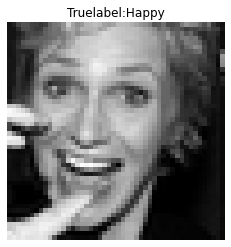

In [ ]:
# generate sample images that are supposed to be correctly predicted
for i in range(0,20):
  indx = np.random.choice(correct_labels_idx)
  test_feature = privatetest_features[indx]
  test_label=privatetest_labels[indx]
  example1 = visualize_image(test_feature, true_label=test_label, savefig = 'example'+str(i)+'.png') 



## Step 5: Write one prediction function for Gradio that accepts one image as input, and output the class label

In [ ]:
def classify_image_cnn(test_image):
  class_labels = {0:'Angry',1:'Disgust', 2:'Fear', 3:'Happy', 4: 'Sad', 5:'Surprise', 6:'Neutral'}
  print("test_image: ",test_image.shape)
  
  test_image = test_image.reshape((1,48*48))
  # normalize the image 
  test_image_scaled = neuralnet_scaler.transform(test_image)
  
  test_image_scaled = test_image_scaled.reshape((1,48,48,1))
  # make a prediction
  pred_class = CNN_model_loaded.predict(test_image_scaled)[0]

  # pred_class is the softmax output, which returns 7 probabilities for all classes, e.g., [0.3, 0.1,0.3,0.2, 0.05,0.01]

  # save to dictionary for gradio to visualize, e.g., {'Angry': 0.3, 'Disgust': 0.1, .......}
  class_dict = {}
  for idx in range(0, len(pred_class)):
    prob = pred_class[idx]
    class_name = class_labels[idx]
    class_dict[class_name] = float(prob)
  print("class_dict: ",class_dict)
  return class_dict

In [ ]:
test_image = privatetest_features[50]
true_label = privatetest_labels[50]
classify_image_cnn(test_image)


test_image:  (2304,)
['66' '60' '65' ... '74' '76' '97']
class_dict:  {'Angry': 0.062669537961483, 'Disgust': 0.0010508772684261203, 'Fear': 0.07622069120407104, 'Happy': 0.3658990263938904, 'Sad': 0.21061453223228455, 'Surprise': 0.2774357199668884, 'Neutral': 0.006109630689024925}


{'Angry': 0.062669537961483,
 'Disgust': 0.0010508772684261203,
 'Fear': 0.07622069120407104,
 'Happy': 0.3658990263938904,
 'Neutral': 0.006109630689024925,
 'Sad': 0.21061453223228455,
 'Surprise': 0.2774357199668884}

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# rf_scaled_dict = np.load("/content/drive/MyDrive/Data/rf_scaled_dict.npy", allow_pickle=True)
rf_scaled_dict = {'Method': ['Random Forest'], 'Accuracy': [0.46698244636388964], 'Precision': [0.4890536721540649], 'Recall': [0.46698244636388964], 'F1-Score': [0.44319711689658836]}

new_report = pd.DataFrame(rf_scaled_dict)
new_report

final_overall_report = pd.read_csv("/content/drive/MyDrive/Data/final_overall_report.csv")
final_overall_report
# final_overall_report = final_overall_report.append(new_report)
# # final_overall_report
# final_overall_report.to_csv("/content/drive/MyDrive/Data/final_overall_report.csv",index=None)


,Method,Accuracy,Precision,Recall,F1-Score
0,Deeper Convoluted Neural Network,0.648927,0.659324,0.648927,0.647473
1,Random Forest,0.466982,0.489054,0.466982,0.443197
